# Dubai Properties

#### Данные
- trans_group_en – тип транзакции (покупка/подарок/ипотека)
- procedure_name_en – тип процедуры покупки
- instance_date – дата покупки
- property_type_en – тип объекта недвижимости
- property_sub_type_en – подтип объекта недвижимости
- property_usage_en – назначение объекта недвижимости
- reg_type_en – тип готовности объекта
- area_name_en – название района/города в Дубае
- building_name_en – название здания
- project_name_en – название ЖК
- master_project_en – название проекта
- nearest_landmark_en – ближайшая достопримечательность
- nearest_metro_en – ближайшее метро
- nearest_mall_en – ближайший ТРЦ
- rooms_en – количество комнат
- has_parking – есть ли паркинг
- procedure_area – площадь
- actual_worth – стоимость
- meter_sale_price – стоимость за квадратный метрa

## 1. Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

transaction_id	procedure_id	trans_group_id	trans_group_ar	trans_group_en	procedure_name_ar	procedure_name_en	instance_date	property_type_id	property_type_ar	property_type_en	property_sub_type_id	property_sub_type_ar	property_sub_type_en	property_usage_ar	property_usage_en	reg_type_id	reg_type_ar	reg_type_en	area_id	area_name_ar	area_name_en	building_name_ar	building_name_en	project_number	project_name_ar	project_name_en	master_project_en	master_project_ar	nearest_landmark_ar	nearest_landmark_en	nearest_metro_ar	nearest_metro_en	nearest_mall_ar	nearest_mall_en	rooms_ar	rooms_en	has_parking	procedure_area	actual_worth	meter_sale_price	rent_value	meter_rent_price	no_of_parties_role_1	no_of_parties_role_2	no_of_parties_role_3

In [3]:
#Импортирование данных

DF = pd.read_csv('Transactions_new.csv')

In [4]:
# Проверяем уникальность каждой ячейки
uniqueness = DF['procedure_id'].nunique()

# Выводим резалт
print(f"Number of unique values in 'procedure_id': {uniqueness}")

Number of unique values in 'procedure_id': 50


In [7]:
DF['master_project_en'].nunique()

172

In [5]:
# Выводим датасет и убеждаемся, что все импортировалось как нужно

DF.head(5)

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2001-165,11,1,مبايعات,Sales,بيع,Sell,24-02-2001,1,أرض,...,NaN,0,1393.55,1350000.0,968.75,NaN,NaN,1.0,1.0,0.0
1,3-9-2004-223,9,3,هبات,Gifts,هبه,Grant,13-12-2004,4,فيلا,...,NaN,0,1728.00,2790000.0,1614.58,NaN,NaN,1.0,1.0,0.0
2,2-13-1996-119,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,12-03-2001,1,أرض,...,NaN,0,929.03,20000000.0,21527.83,NaN,NaN,1.0,1.0,0.0
3,2-14-2005-222,14,2,رهون,Mortgages,تعديل رهن,Modify Mortgage,20-09-2005,2,مبنى,...,NaN,0,2673.28,25000000.0,9351.81,NaN,NaN,1.0,1.0,0.0
4,3-9-2012-874,9,3,هبات,Gifts,هبه,Grant,11-10-2012,4,فيلا,...,NaN,0,1541.17,9000000.0,5839.72,NaN,NaN,1.0,1.0,0.0


In [190]:
# Оставляем только необходимые нам столбцы

DF = DF[[
    'trans_group_en', 
    'procedure_name_en', 
    'instance_date', 
    'property_sub_type_en', 
    'property_usage_en', 
    'reg_type_en',
    'area_name_en',
    'master_project_en',
    'nearest_landmark_en',
    'nearest_metro_en',
    'nearest_mall_en',
    'rooms_en',
    'has_parking',
    'procedure_area',
    'meter_sale_price',
]]

In [24]:
# Calculate the percentage of missing values
na_percentage = DF['property_type_en'].isnull().mean() * 100

# Print the result
print(f"Percentage of missing values in 'property_sub_type_en': {na_percentage}%")

Percentage of missing values in 'property_sub_type_en': 0.0%


In [191]:
# Выводим свойства столбцов датасета

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059241 entries, 0 to 1059240
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_group_en        1059241 non-null  object 
 1   procedure_name_en     1059241 non-null  object 
 2   instance_date         1059236 non-null  object 
 3   property_sub_type_en  817279 non-null   object 
 4   property_usage_en     1059241 non-null  object 
 5   reg_type_en           1059241 non-null  object 
 6   area_name_en          1059241 non-null  object 
 7   master_project_en     873552 non-null   object 
 8   nearest_landmark_en   930932 non-null   object 
 9   nearest_metro_en      818462 non-null   object 
 10  nearest_mall_en       813109 non-null   object 
 11  rooms_en              808343 non-null   object 
 12  has_parking           1059241 non-null  int64  
 13  procedure_area        1059241 non-null  float64
 14  meter_sale_price      1059241 non-

In [192]:
# Посчитаем пропуски по столбцам
# Видно, что пропуски в основном в категориальных переменных. Их мы не сможем заменить, поэтому будем избавляться от всех NA.

DF.isna().sum()

trans_group_en               0
procedure_name_en            0
instance_date                5
property_sub_type_en    241962
property_usage_en            0
reg_type_en                  0
area_name_en                 0
master_project_en       185689
nearest_landmark_en     128309
nearest_metro_en        240779
nearest_mall_en         246132
rooms_en                250898
has_parking                  0
procedure_area               0
meter_sale_price             0
dtype: int64

In [193]:
# Очистка данных

DF.dropna(inplace=True)

In [194]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564755 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trans_group_en        564755 non-null  object 
 1   procedure_name_en     564755 non-null  object 
 2   instance_date         564755 non-null  object 
 3   property_sub_type_en  564755 non-null  object 
 4   property_usage_en     564755 non-null  object 
 5   reg_type_en           564755 non-null  object 
 6   area_name_en          564755 non-null  object 
 7   master_project_en     564755 non-null  object 
 8   nearest_landmark_en   564755 non-null  object 
 9   nearest_metro_en      564755 non-null  object 
 10  nearest_mall_en       564755 non-null  object 
 11  rooms_en              564755 non-null  object 
 12  has_parking           564755 non-null  int64  
 13  procedure_area        564755 non-null  float64
 14  meter_sale_price      564755 non-null  float64
dt

In [195]:
# Оставляем только интересующие нас типы недвижимости

DF = DF[DF['property_sub_type_en'].isin(['Villa', 'Flat'])]

In [196]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

In [197]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479529 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        479529 non-null  category      
 1   procedure_name_en     479529 non-null  category      
 2   instance_date         479529 non-null  datetime64[ns]
 3   property_sub_type_en  479529 non-null  category      
 4   property_usage_en     479529 non-null  category      
 5   reg_type_en           479529 non-null  category      
 6   area_name_en          479529 non-null  category      
 7   master_project_en     479529 non-null  category      
 8   nearest_landmark_en   479529 non-null  category      
 9   nearest_metro_en      479529 non-null  category      
 10  nearest_mall_en       479529 non-null  category      
 11  rooms_en              479529 non-null  category      
 12  has_parking           479529 non-null  category      
 

## 2. Обогащение данными

### 2.1 Геокодинг
В рамках геокодинга добавим:
- координаты объекта
- расстояние до метро
- расстояние до ТРЦ
- расстояние до ближайшей достопримечательности

In [198]:
# Импортируем библиотеки геокодинга

from geopy.geocoders import Nominatim
from geopy import distance

In [199]:
# Уникальные названия ЖК, по ним будем искать их координаты

print(DF['master_project_en'].unique())

['Springs - 7', 'Springs - 5', 'Springs - 1', 'Springs - 2', 'Springs - 3', ..., 'Lakes - Hattan II', 'Meadows 7', 'Meadows 2', 'Emirates Hills', 'DUBAI HILLS - SIDRA 1']
Length: 71
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [200]:
# Инициализируем геолокатор

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

In [201]:
# Сформируем отдельный датасеты для геокодинга, тк основной датасет очень большой

DF_master_project = pd.DataFrame({
    "master_project_en": DF['master_project_en'].unique()
})

DF_metro = pd.DataFrame({
    "nearest_metro_en": DF['nearest_metro_en'].unique()
})

DF_landmark = pd.DataFrame({
    "nearest_landmark_en": DF['nearest_landmark_en'].unique()
})

DF_mall = pd.DataFrame({
    "nearest_mall_en": DF['nearest_mall_en'].unique()
})

In [202]:
# Добавим новый столбец с полным адресом и сделаем геокодинг

DF_master_project['full_address'] = DF_master_project.master_project_en.astype("str") + ', Dubai, United Arab Emirates'
DF_master_project['gcode'] = DF_master_project.full_address.apply(geolocator.geocode)

DF_metro['full_address'] = DF_metro.nearest_metro_en.astype("str") + ', Dubai, United Arab Emirates'
DF_metro['gcode'] = DF_metro.full_address.apply(geolocator.geocode)

DF_landmark['full_address'] = DF_landmark.nearest_landmark_en.astype("str") + ', Dubai, United Arab Emirates'
DF_landmark['gcode'] = DF_landmark.full_address.apply(geolocator.geocode)

DF_mall['full_address'] = DF_mall.nearest_mall_en.astype("str") + ', Dubai, United Arab Emirates'
DF_mall['gcode'] = DF_mall.full_address.apply(geolocator.geocode)

In [203]:
# Добавим координаты широты и долготы

DF_master_project['lat'] = [None if g is None else g.latitude for g in DF_master_project.gcode]
DF_master_project['long'] = [None if g is None else g.longitude or None for g in DF_master_project.gcode]

DF_metro['lat'] = [None if g is None else g.latitude for g in DF_metro.gcode]
DF_metro['long'] = [None if g is None else g.longitude or None for g in DF_metro.gcode]

DF_landmark['lat'] = [None if g is None else g.latitude for g in DF_landmark.gcode]
DF_landmark['long'] = [None if g is None else g.longitude or None for g in DF_landmark.gcode]

DF_mall['lat'] = [None if g is None else g.latitude for g in DF_mall.gcode]
DF_mall['long'] = [None if g is None else g.longitude or None for g in DF_mall.gcode]

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,NaN,NaN
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.066685,55.162874


In [204]:
# Вручную добавим недостающие координаты для ЖК

DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'lat'] = 25.033542993655033
DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'long'] = 55.18917001485356
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'lat'] = 25.097428719611617
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'long'] = 55.17756110264013
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'lat'] = 24.96105936394376
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'long'] = 55.08270192949124
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'lat'] = 25.094272787442044
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'long'] = 55.175560083372986
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'lat'] = 25.000211714542417
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'long'] = 55.16834169258494
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'lat'] = 25.19770179006602
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'long'] = 55.355695124267285
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'lat'] = 25.09214442690163
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'long'] = 55.15783349732667
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'lat'] = 25.083137305514395 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'long'] = 55.139013137811546
DF_master_project.at[24, 'lat'] = 25.083137305514395 
DF_master_project.at[24, 'long'] = 55.139013137811546
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'lat'] = 25.23606273566597
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'long'] = 55.32270853013264
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'lat'] = 25.232945714600916
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'long'] = 55.32351188330427
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'lat'] = 25.19949550070485 
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'long'] = 55.27392556849345
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'lat'] = 25.07247559744288 
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'long'] = 55.1392704930149
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'lat'] = 25.081750780370683 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'long'] = 55.16575089175726
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'lat'] = 25.09335555736875
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'long'] = 55.25403781082174
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'lat'] = 25.098416484757895
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'long'] = 55.25332656664681
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'lat'] = 25.10582583562555
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'long'] = 55.255374215092395
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'lat'] = 25.195915926712992
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'long'] = 55.277645310842416 

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,25.081751,55.165751
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.066685,55.162874


In [205]:
DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,NaN,NaN
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(مدينة دبي للإنترنت, قرية المعرفة, دبي, الإمار...",25.095235,55.159757
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي, شارع الملك سلمان بن عبدالعزي...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,NaN,NaN
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,NaN,NaN
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [206]:
# Вручную добавим недостающие координаты для метро

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'lat'] = 25.079982099455968
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'long'] = 55.138149278107555

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'lat'] = 25.076428135523372
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'long'] = 55.14197616849133

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'lat'] = 25.201611651560157
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'long'] = 55.26950781266849

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'lat'] = 25.08899029789469 
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'long'] = 55.15809260783653

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'lat'] = 25.074385143932265
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'long'] = 55.132397009931175

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'lat'] = 25.19145596093731
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'long'] = 55.26030076849341

DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'lat'] = 25.120000197937358
DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'long'] = 55.19958610120157

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'lat'] = 25.225180015939067
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'long'] = 55.33365092616389

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'lat'] = 25.219379082537397
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'long'] = 55.33883459548382

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'lat'] = 25.23107478400269
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'long'] = 55.32279349732888

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'lat'] = 25.2337450495845
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'long'] = 55.29209721082395

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'lat'] = 25.155942586558552
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'long'] = 55.22849041082285

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'lat'] = 25.265013251747984
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'long'] = 55.287912496065125

DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,25.088990,55.158093
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(مدينة دبي للإنترنت, قرية المعرفة, دبي, الإمار...",25.095235,55.159757
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي, شارع الملك سلمان بن عبدالعزي...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,25.120000,55.199586
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,25.155943,55.228490
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [207]:
DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,NaN,NaN
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,NaN,NaN
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, دبي, الإمارات العربية المتحد...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,NaN,NaN
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [208]:
# Вручную добавим недостающие координаты для достопримечательностей

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'lat'] = 25.042132693409545
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'long'] = 55.21952377218269

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'lat'] = 24.967218956410264 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'long'] = 55.15768472638599

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'lat'] = 25.082279418420768 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'long'] = 55.3180615792579

DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,25.042133,55.219524
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,24.967219,55.157685
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, دبي, الإمارات العربية المتحد...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,25.082279,55.318062
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [209]:
DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع البرشاء 2, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,NaN,NaN
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


In [210]:
# Вручную добавим недостающие координаты для ТРЦ

DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'lat'] = 25.0447415858032
DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'long'] = 55.12027573965596

DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع البرشاء 2, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,25.044742,55.120276
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


Теперь у нас есть дополнительные 4 датасета, которые содержат в себе координаты объектов.
На основе этих координат мы можем обогатить основной датасет расстояниями от ЖК до:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

### 2.2 Обогащение данными
В основной датасет добавим расстояния:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

In [211]:
# Добавим в основной датасет столбец с расстоянием до метро/достопримечательности/трц

distance_to_metro_col = []
distance_to_landmark_col = []
distance_to_mall_col = []


for index, row in DF.iterrows():
    # master_project
    master_project_match = DF_master_project.loc[row['master_project_en'] == DF_master_project['master_project_en']]
    master_project_lat = master_project_match.lat.values[0]
    master_project_long = master_project_match.long.values[0]
    master_project_coordinates = (master_project_lat, master_project_long)
    
    # metro
    metro_match = DF_metro.loc[row['nearest_metro_en'] == DF_metro['nearest_metro_en']]
    metro_lat = metro_match.lat.values[0]
    metro_long = metro_match.long.values[0]
    metro_coordinates = (metro_lat, metro_long)
    distance_to_metro = distance.distance(master_project_coordinates, metro_coordinates).m
    distance_to_metro_col.append(distance_to_metro)
    
    # landmark
    landmark_match = DF_landmark.loc[row['nearest_landmark_en'] == DF_landmark['nearest_landmark_en']]
    landmark_lat = landmark_match.lat.values[0]
    landmark_long = landmark_match.long.values[0]
    landmark_coordinates = (landmark_lat, landmark_long)
    distance_to_landmark = distance.distance(master_project_coordinates, landmark_coordinates).m
    distance_to_landmark_col.append(distance_to_landmark)
    
    # mall
    mall_match = DF_mall.loc[row['nearest_mall_en'] == DF_mall['nearest_mall_en']]
    mall_lat = mall_match.lat.values[0]
    mall_long = mall_match.long.values[0]
    mall_coordinates = (mall_lat, mall_long)
    distance_to_mall = distance.distance(master_project_coordinates, mall_coordinates).m
    distance_to_mall_col.append(distance_to_mall)
    
DF['distance_to_metro'] = distance_to_metro_col
DF['distance_to_landmark'] = distance_to_landmark_col
DF['distance_to_mall'] = distance_to_mall_col


DF


,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
764,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,4542.71,4775.360648,3713.843980,5177.005216
765,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,3996.07,4775.360648,3713.843980,5177.005216
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,2568.54,4019.665126,4079.460028,4736.895258
767,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,5045.74,4019.665126,4079.460028,4736.895258
768,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,4058.53,4019.665126,4079.460028,4736.895258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,Sales,Sell - Pre registration,2023-04-05,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1,58.03,14147.85,5806.761909,3331.812612,5322.349522
1059084,Sales,Sell - Pre registration,2023-03-29,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,2 B/R,1,103.29,17609.53,2941.699306,6113.173101,5621.592002
1059085,Sales,Sell - Pre registration,2023-03-21,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1,59.66,23481.19,2941.699306,6113.173101,5621.592002
1059086,Sales,Sell - Pre registration,2023-03-30,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1,65.53,23178.51,2941.699306,6113.173101,5621.592002


In [212]:
#DF.to_csv('./Transactions_geocoded.csv', index=False)
#DF = pd.read_csv('Transactions_geocoded.csv')

In [213]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
764,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,4542.71,4775.360648,3713.843980,5177.005216
765,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,3996.07,4775.360648,3713.843980,5177.005216
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,2568.54,4019.665126,4079.460028,4736.895258
767,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,5045.74,4019.665126,4079.460028,4736.895258
768,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,4058.53,4019.665126,4079.460028,4736.895258


In [214]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

#### 2.3 Дополнительное обогащение данными
- Разбивку по годам/месяцам/дням
- Медианная цена за квадратный метр по району за ближайшие 3 месяца

In [215]:
# Добавляем разбивку по годам, месяцам и дням

DF['dt_day'] = DF['instance_date'].dt.day
DF['dt_month'] = DF['instance_date'].dt.month
DF['dt_year'] = DF['instance_date'].dt.year

In [216]:
# Добавляем медианную цену за квадратный метр по району за ближайшие 3 месяца

median_prices = []

for index, row in DF.iterrows():
    properties = DF.loc[
        (row['area_name_en'] == DF['area_name_en']) & 
        (row['rooms_en'] == DF['rooms_en']) &
        (row['instance_date'] + pd.Timedelta(days = 92) > DF['instance_date']) & 
        (row['instance_date'] < DF['instance_date'])
    ]
    
    median_price = properties['meter_sale_price'].median()
    median_price = row['meter_sale_price'] if np.isnan(median_price) else median_price
        
    median_prices.append(median_price)
    
DF['median_price_in_area_for_last_3_month'] = median_prices

In [217]:
DF

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,...,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,dt_day,dt_month,dt_year,median_price_in_area_for_last_3_month
764,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,...,0,331.30,4542.71,4775.360648,3713.843980,5177.005216,30,3,2010,3887.000
765,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,...,0,315.31,3996.07,4775.360648,3713.843980,5177.005216,26,10,2015,6932.650
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,257.69,2568.54,4019.665126,4079.460028,4736.895258,22,11,2007,2481.040
767,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,455.83,5045.74,4019.665126,4079.460028,4736.895258,22,11,2007,2481.040
768,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,455.83,4058.53,4019.665126,4079.460028,4736.895258,1,8,2007,2371.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,Sales,Sell - Pre registration,2023-04-05,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,...,1,58.03,14147.85,5806.761909,3331.812612,5322.349522,5,4,2023,15145.450
1059084,Sales,Sell - Pre registration,2023-03-29,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,103.29,17609.53,2941.699306,6113.173101,5621.592002,29,3,2023,22063.060
1059085,Sales,Sell - Pre registration,2023-03-21,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,59.66,23481.19,2941.699306,6113.173101,5621.592002,21,3,2023,22477.980
1059086,Sales,Sell - Pre registration,2023-03-30,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,65.53,23178.51,2941.699306,6113.173101,5621.592002,30,3,2023,22590.630


In [3]:
#DF.to_csv('./Transactions_geocoded.csv', index=False)
DF = pd.read_csv('Transactions_geocoded.csv')

In [4]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

In [5]:
DF

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,...,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,dt_day,dt_month,dt_year,median_price_in_area_for_last_3_month
0,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,...,0,331.30,4542.71,4775.360648,3713.843980,5177.005216,30,3,2010,3887.000
1,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,...,0,315.31,3996.07,4775.360648,3713.843980,5177.005216,26,10,2015,6932.650
2,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,257.69,2568.54,4019.665126,4079.460028,4736.895258,22,11,2007,2481.040
3,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,455.83,5045.74,4019.665126,4079.460028,4736.895258,22,11,2007,2481.040
4,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,455.83,4058.53,4019.665126,4079.460028,4736.895258,1,8,2007,2371.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479524,Sales,Sell - Pre registration,2023-04-05,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,...,1,58.03,14147.85,5806.761909,3331.812612,5322.349522,5,4,2023,15145.450
479525,Sales,Sell - Pre registration,2023-03-29,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,103.29,17609.53,2941.699306,6113.173101,5621.592002,29,3,2023,22063.060
479526,Sales,Sell - Pre registration,2023-03-21,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,59.66,23481.19,2941.699306,6113.173101,5621.592002,21,3,2023,22477.980
479527,Sales,Sell - Pre registration,2023-03-30,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,...,1,65.53,23178.51,2941.699306,6113.173101,5621.592002,30,3,2023,22590.630


## 3. Статистический анализ

### 3.1 Проверка на нормальность и выбросы


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479529 entries, 0 to 479528
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   trans_group_en                         479529 non-null  category      
 1   procedure_name_en                      479529 non-null  category      
 2   instance_date                          479529 non-null  datetime64[ns]
 3   property_sub_type_en                   479529 non-null  category      
 4   property_usage_en                      479529 non-null  category      
 5   reg_type_en                            479529 non-null  category      
 6   area_name_en                           479529 non-null  category      
 7   master_project_en                      479529 non-null  category      
 8   nearest_landmark_en                    479529 non-null  category      
 9   nearest_metro_en                       479529 no

#### 3.1.1 Стоимость за кв. метр


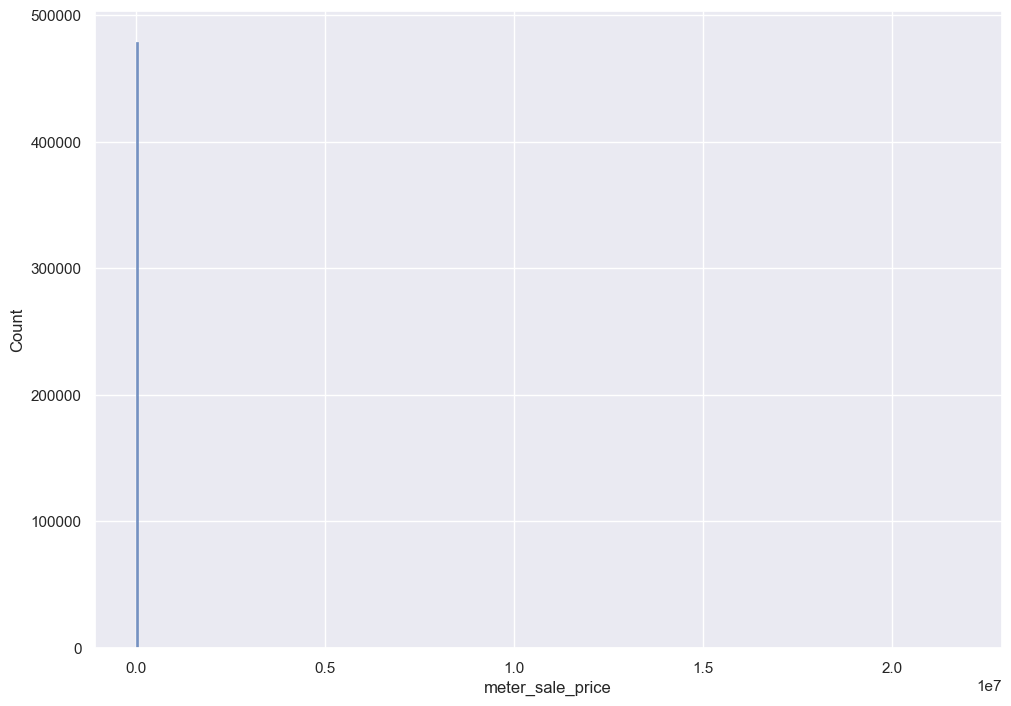

In [7]:
# Проверка на нормальность распределения цены за кв. м.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['meter_sale_price'], bins=300)
plt.show()

<Axes: xlabel='meter_sale_price'>

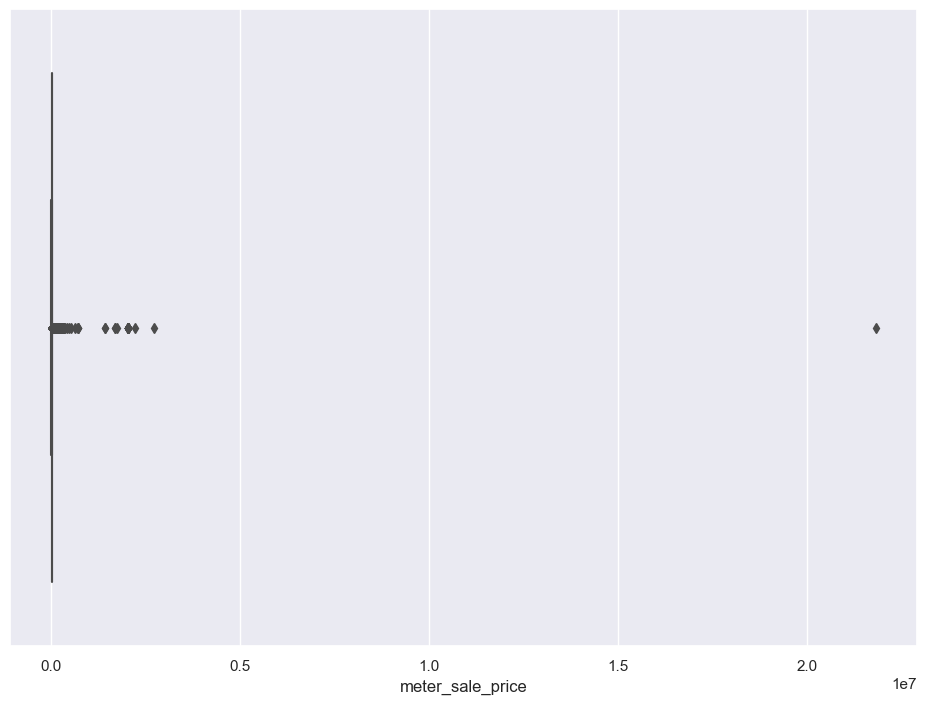

In [8]:
sns.boxplot(x=DF["meter_sale_price"])

In [9]:
# Функция поиска выбросов

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df < (q1 - 1 * IQR)) | (df > (q3 + 1 * IQR)))]
   return outliers

In [10]:
outliers = find_outliers_IQR(DF['meter_sale_price'])

print('number of rows: '+ str(len(DF['meter_sale_price'])))

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of rows: 479529
number of outliers: 36238
max outlier value: 21811987.51
min outlier value: 0.01


In [11]:
outliers

81        22492.83
184       24150.47
230       24534.14
303       40834.10
306       40902.82
            ...   
479505    24120.80
479506    28585.11
479507    28148.85
479526    23481.19
479527    23178.51
Name: meter_sale_price, Length: 36238, dtype: float64

In [12]:
# Избавляемся от выбросов

cols = ['meter_sale_price'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1 * IQR)) | (DF[cols] > (Q3 + 1 * IQR))).any(axis=1)]

<Axes: xlabel='meter_sale_price'>

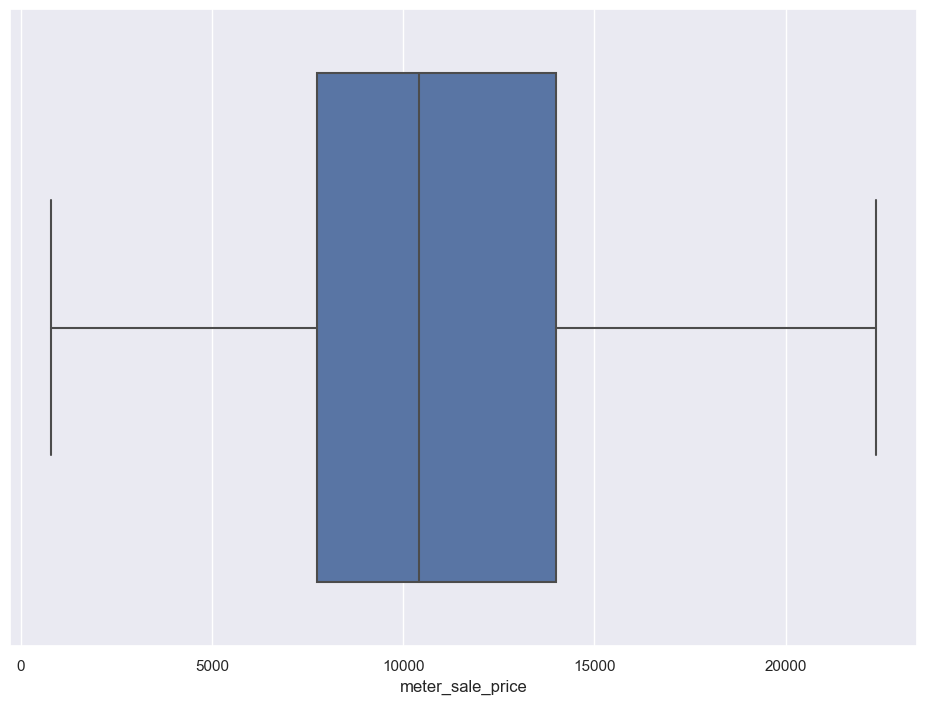

In [13]:
sns.boxplot(x=DF["meter_sale_price"])

<Axes: xlabel='meter_sale_price', ylabel='Count'>

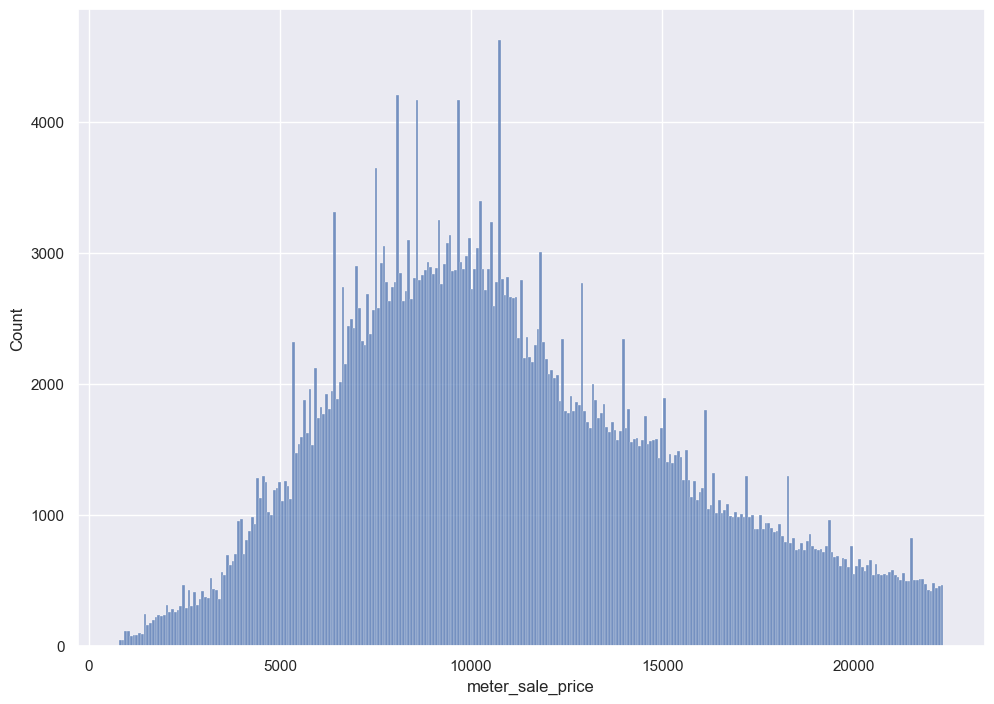

In [14]:
sns.histplot(DF['meter_sale_price'], bins=300)


#### 3.1.2 Площадь

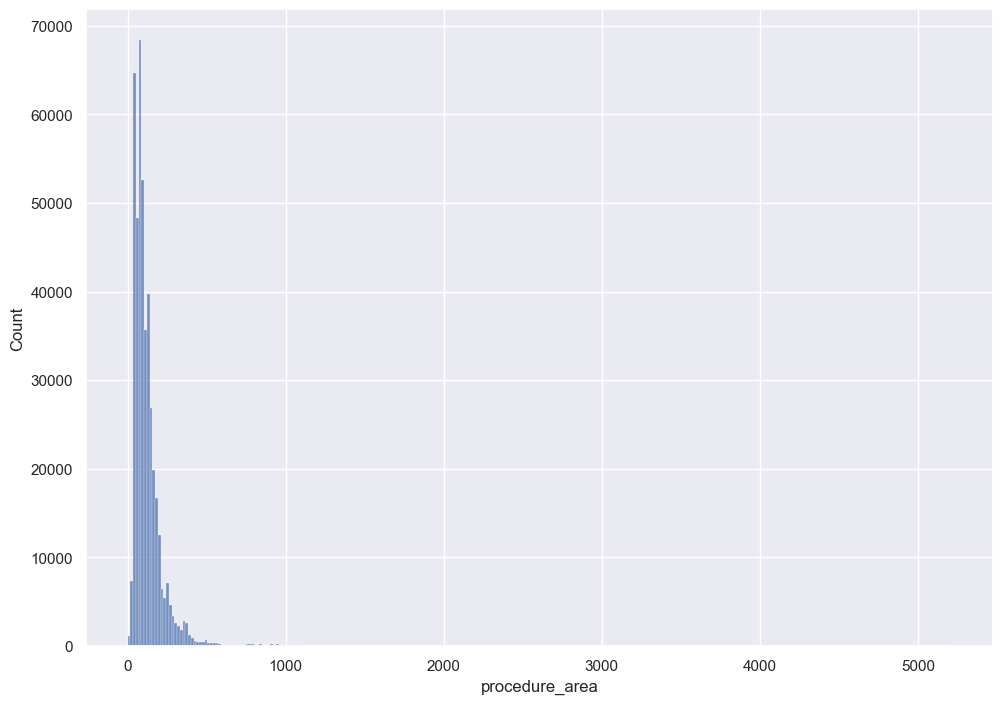

In [15]:
# Проверка на нормальность распределения площади

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['procedure_area'], bins=300)
plt.show()

<Axes: xlabel='procedure_area'>

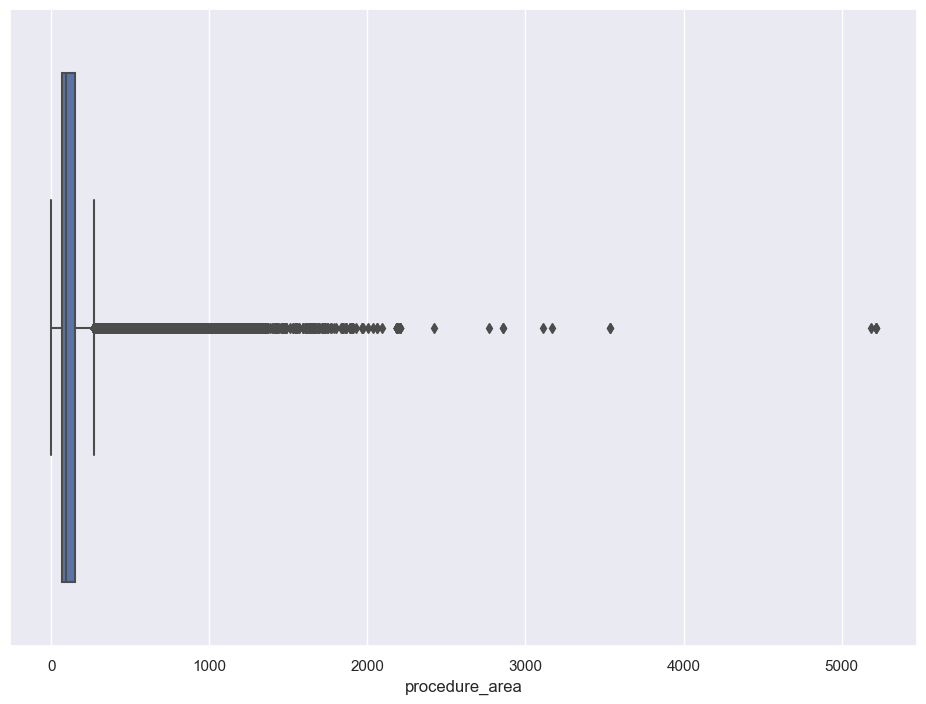

In [16]:
sns.boxplot(x=DF["procedure_area"])

In [17]:
outliers_sq = find_outliers_IQR(DF['procedure_area'])

print('number of rows: '+ str(len(DF['procedure_area'])))

print('number of outliers: '+ str(len(outliers_sq)))

print('max outlier value: '+ str(outliers_sq.max()))

print('min outlier value: '+ str(outliers_sq.min()))

number of rows: 443291
number of outliers: 41616
max outlier value: 5214.55
min outlier value: 228.47


In [18]:
# Избавляемся от выбросов

cols = ['procedure_area'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1 * IQR)) |(DF[cols] > (Q3 + 1 * IQR))).any(axis=1)]

<Axes: xlabel='procedure_area', ylabel='Count'>

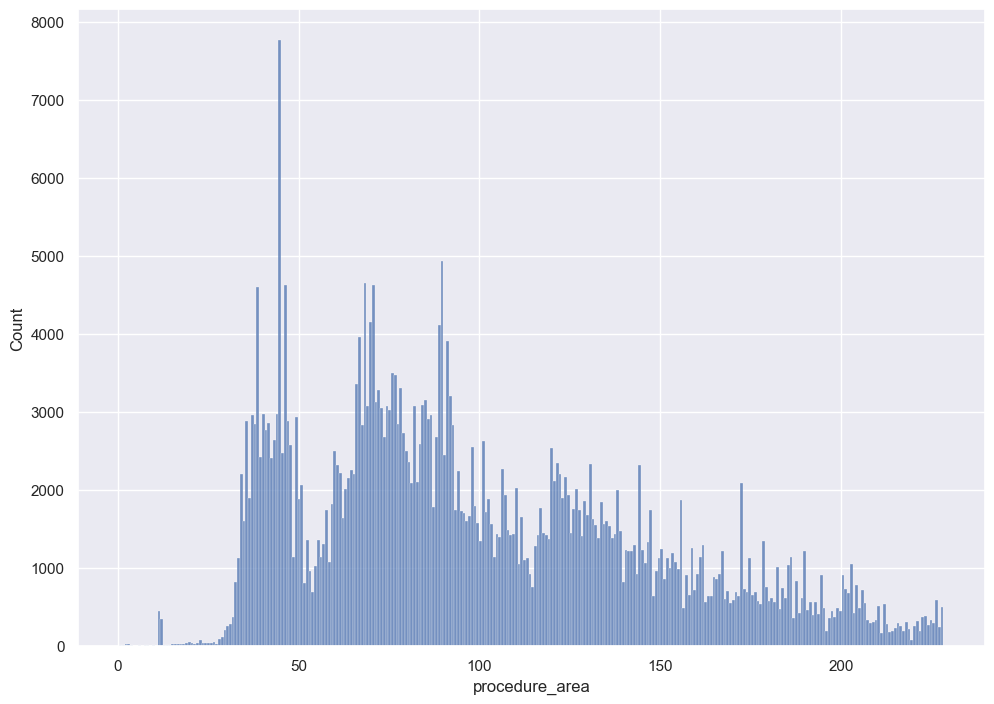

In [19]:
sns.histplot(DF['procedure_area'], bins=300)

<Axes: xlabel='procedure_area'>

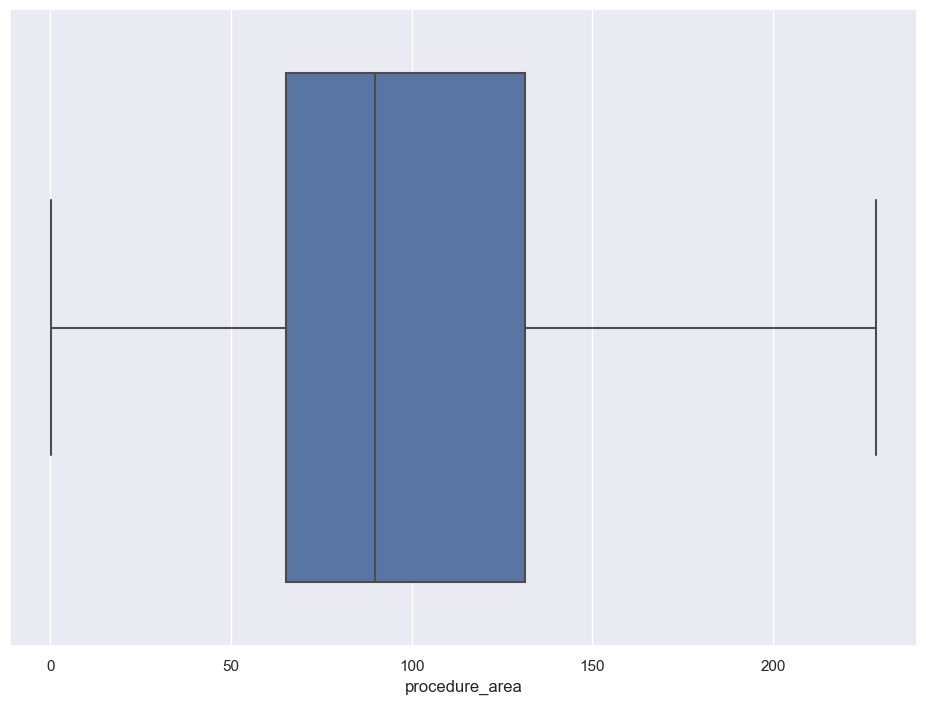

In [20]:
sns.boxplot(x=DF["procedure_area"])

#### 2.4 Подготовка датасета про ЖК

In [20]:
len(DF_master_project['master_project_en'].unique())

NameError: name 'DF_master_project' is not defined

In [ ]:
len(DF['master_project_en'].unique())

In [386]:
DF_master_project = DF_master_project[DF_master_project['master_project_en'].isin(DF['master_project_en'].unique())]

In [387]:
areas = []
nearest_metros = []
nearest_landmarks = []
nearest_malls = []
nearest_metros_dis = []
nearest_landmarks_dis = []
nearest_malls_dis = []
median_prices = []

for index, row in DF_master_project.iterrows():
    master_project_match = DF[row['master_project_en'] == DF['master_project_en']].iloc[0]
    areas.append(master_project_match['area_name_en'])
    nearest_metros.append(master_project_match['nearest_metro_en'])
    nearest_landmarks.append(master_project_match['nearest_landmark_en'])
    nearest_malls.append(master_project_match['nearest_mall_en'])
    nearest_metros_dis.append(master_project_match['distance_to_metro'])
    nearest_landmarks_dis.append(master_project_match['distance_to_landmark'])
    nearest_malls_dis.append(master_project_match['distance_to_mall'])
    median_prices.append(master_project_match['median_price_in_area_for_last_3_month'])

DF_master_project['area_name_en'] = areas
DF_master_project['nearest_metro_en'] = nearest_metros
DF_master_project['nearest_landmark_en'] = nearest_landmarks
DF_master_project['nearest_mall_en'] = nearest_malls
DF_master_project['distance_to_metro'] = nearest_metros_dis
DF_master_project['distance_to_landmark'] = nearest_landmarks_dis
DF_master_project['distance_to_mall'] = nearest_malls_dis
DF_master_project['median_price_in_area_for_last_3_month'] = median_prices # можно ли так?

In [388]:
DF_master_project

,master_project_en,full_address,gcode,lat,long,area_name_en,nearest_metro_en,nearest_landmark_en,nearest_mall_en,distance_to_metro,distance_to_landmark,distance_to_mall,median_price_in_area_for_last_3_month
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513,Al Thanayah Fourth,Damac Properties,Sports City Swimming Academy,Marina Mall,4775.360648,3713.843980,5177.005216,4745.020
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041,Al Thanayah Fourth,Nakheel Metro Station,Sports City Swimming Academy,Marina Mall,4019.665126,4079.460028,4736.895258,2584.430
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821,Al Thanayah Fourth,Damac Properties,Sports City Swimming Academy,Marina Mall,2476.639408,6285.874608,2511.644741,7372.480
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019,Al Thanayah Fourth,Nakheel Metro Station,Sports City Swimming Academy,Marina Mall,3612.487872,5561.889212,3255.336483,6268.860
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046,Al Thanayah Fourth,Nakheel Metro Station,Sports City Swimming Academy,Marina Mall,3892.883350,4721.515093,3978.352952,7477.740
5,Springs - 6,"Springs - 6, Dubai, United Arab Emirates","(الينابيع 6, دبي, الإمارات العربية المتحدة, (2...",25.068259,55.189257,Al Thanayah Fourth,Damac Properties,Sports City Swimming Academy,Marina Mall,4398.409064,4207.574304,4849.830010,2226.295
6,Springs - 4,"Springs - 4, Dubai, United Arab Emirates","(الينابيع 4, دبي, الإمارات العربية المتحدة, (2...",25.061119,55.179532,Al Thanayah Fourth,Nakheel Metro Station,Sports City Swimming Academy,Marina Mall,3769.663447,4550.682930,4131.893965,2386.050
7,Lakes - Maeen,"Lakes - Maeen, Dubai, United Arab Emirates","(The Lakes, تلال الإمارات, Maeen, دبي, الإمارا...",25.080863,55.169241,Al Thanyah Third,Nakheel Metro Station,Burj Al Arab,Marina Mall,1440.647604,6886.603145,2811.237147,8666.640
8,Lakes - Forat,"Lakes - Forat, Dubai, United Arab Emirates","(Lakes Ring Road, The Lakes, تلال الإمارات, Zu...",25.077657,55.171853,Al Thanyah Third,Nakheel Metro Station,Sports City Swimming Academy,Marina Mall,1871.617830,6214.704762,3026.366314,9630.350
9,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270,Al Hebiah First,Sharaf Dg Metro Station,Motor City,Mall of the Emirates,24121.636266,0.000000,8759.668025,8158.280


In [389]:
DF_master_project.to_csv('./Master_Projects.csv', index=False)

### 3.2 Тренд изменения цены

In [21]:
price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()

flats = DF[DF['property_sub_type_en'] == 'Flat']
price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()

/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_44036/2387785675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()
/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_44036/2387785675.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()


In [22]:
price_trend_data

procedure_area  meter_sale_price  \
instance_date property_sub_type_en                                     
2004-05-05    Flat                      143.037500       8856.695000   
              Villa                            NaN               NaN   
2004-05-06    Flat                      167.440000       7754.200000   
              Villa                            NaN               NaN   
2004-05-22    Flat                      175.290000       7986.760000   
...                                            ...               ...   
2023-04-12    Villa                     191.768000      11707.408000   
2023-04-13    Flat                       89.891714      12386.215571   
              Villa                     177.070000       9367.376667   
2023-04-14    Flat                       78.150476      14213.263810   
              Villa                            NaN               NaN   

                                    distance_to_metro  distance_to_landmark  \
instance_date property_sub_type_en                                            
2004-05-05    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-06    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-22    Flat                           0.000000           8148.440930   
...                                               ...                   ...   
2023-04-12    Villa                       5835.490039           5376.491094   
2023-04-13    Flat                        4912.381286           4586.042151   
              Villa                       5228.440977           4415.833910   
2023-04-14    Flat                       15106.157208           3967.287848   
              Villa                               NaN                   NaN   

                                    distance_to_mall  dt_day  dt_month  \
instance_date property_sub_type_en                                       
2004-05-05    Flat                       3593.510772     5.0       5.0   
              Villa                              NaN     NaN       NaN   
2004-05-06    Flat                       3593.510772     6.0       5.0   
              Villa                              NaN     NaN       NaN   
2004-05-22    Flat                       3593.510772    22.0       5.0   
...                                              ...     ...       ...   
2023-04-12    Villa                      5913.768226    12.0       4.0   
2023-04-13    Flat                       4659.414041    13.0       4.0   
              Villa                      5728.461970    13.0       4.0   
2023-04-14    Flat                       6316.796708    14.0       4.0   
              Villa                              NaN     NaN       NaN   

                                    dt_year  \
instance_date property_sub_type_en            
2004-05-05    Flat                   2004.0   
              Villa                     NaN   
2004-05-06    Flat                   2004.0   
              Villa                     NaN   
2004-05-22    Flat                   2004.0   
...                                     ...   
2023-04-12    Villa                  2023.0   
2023-04-13    Flat                   2023.0   
              Villa                  2023.0   
2023-04-14    Flat                   2023.0   
              Villa                     NaN   

                                    median_price_in_area_for_last_3_month  
instance_date property_sub_type_en                                         
2004-05-05    Flat                                            8356.415000  
              Villa                                                   NaN  
2004-05-06    Flat                                            7907.980000  
              Villa                                                   NaN  
2004-05-22    Flat                      

<Axes: xlabel='instance_date', ylabel='meter_sale_price'>

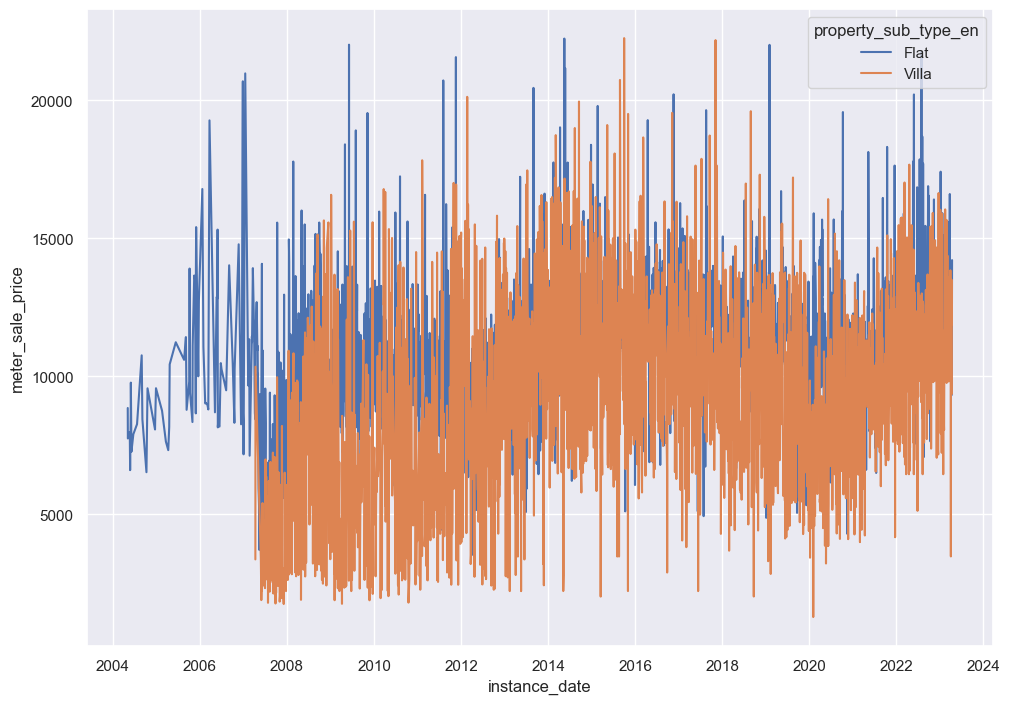

In [23]:
sns.lineplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data, hue = 'property_sub_type_en')
#sns.lmplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data_flats)


### 3.3 Описательная статистика

In [24]:
# Уникальные категории типа транзакции

print(DF['trans_group_en'].unique())

['Sales', 'Mortgages', 'Gifts']
Categories (3, object): ['Gifts', 'Mortgages', 'Sales']


In [25]:
# Период данных

print('Min Date:', DF['instance_date'].min())
print('Max Date:', DF['instance_date'].max())

Min Date: 2004-05-05 00:00:00
Max Date: 2023-04-14 00:00:00


In [26]:
# Уникальные категории подтипа недвижимости

print(DF['property_sub_type_en'].unique())

['Villa', 'Flat']
Categories (2, object): ['Flat', 'Villa']


In [27]:
# Уникальные категории типа назначения помещения

print(DF['property_usage_en'].unique())

['Residential', 'Commercial']
Categories (3, object): ['Commercial', 'Other', 'Residential']


In [28]:
# Уникальные категории типа готовности

print(DF['reg_type_en'].unique())

['Existing Properties', 'Off-Plan Properties']
Categories (2, object): ['Existing Properties', 'Off-Plan Properties']


In [29]:
# Уникальные категории района

print(DF['area_name_en'].unique())

['Al Thanayah Fourth', 'Al Barsha South Fourth', 'Mirdif', 'Dubai Investment Park First', 'Jabal Ali First', ..., 'Al Kifaf', 'Madinat Dubai Almelaheyah', 'Jabal Ali', 'Al Safouh Second', 'Um Hurair Second']
Length: 33
Categories (34, object): ['Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barshaa South Second', 'Al Barshaa South Third', ..., 'Nad Al Shiba First', 'Palm Jumeirah', 'Um Hurair Second', 'Wadi Al Safa 6']


In [30]:
print(DF['master_project_en'].unique())

['Springs - 5', 'Springs - 7', 'Springs - 2', 'Springs - 1', 'Springs - 6', ..., 'Jumeirah Park', 'Dubai Health Care City Phase 1', 'Lakes - Ghadeer', 'DUBAI HILLS - CLUB VILLAS', 'DUBAI HILLS - GOLF GROVE']
Length: 58
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [31]:
# Описательная статистика площади

DF['procedure_area'].describe()

count    401675.000000
mean        100.005842
std          47.321884
min           0.300000
25%          65.210000
50%          89.930000
75%         131.480000
max         228.360000
Name: procedure_area, dtype: float64

In [32]:
# Описательная статистика стоимости

DF['meter_sale_price'].describe()

count    401675.000000
mean      11339.229789
std        4361.623113
min         799.910000
25%        8070.000000
50%       10689.860000
75%       14244.795000
max       22350.690000
Name: meter_sale_price, dtype: float64

In [33]:
# Описательная статистика расстояния до метро, в метрах

DF['distance_to_metro'].describe()

count    401675.000000
mean       4328.971851
std        5430.426416
min           0.000000
25%         695.155326
50%        1844.897775
75%        5806.761909
max       25307.077838
Name: distance_to_metro, dtype: float64

In [34]:
# Описательная статистика расстояния до достопримечательности, в метрах

DF['distance_to_landmark'].describe()

count    401675.000000
mean       5235.441101
std        3444.374469
min           0.000000
25%        1737.059219
50%        5513.633151
75%        8585.265436
max       15091.771997
Name: distance_to_landmark, dtype: float64

In [35]:
# Описательная статистика расстояния до ТЦ, в метрах

DF['distance_to_mall'].describe()

count    401675.000000
mean       3759.445283
std        3154.011084
min         421.836071
25%         739.178337
50%        3482.198246
75%        6687.332455
max       11629.098059
Name: distance_to_mall, dtype: float64

### 3.4 Корреляция

<Axes: >

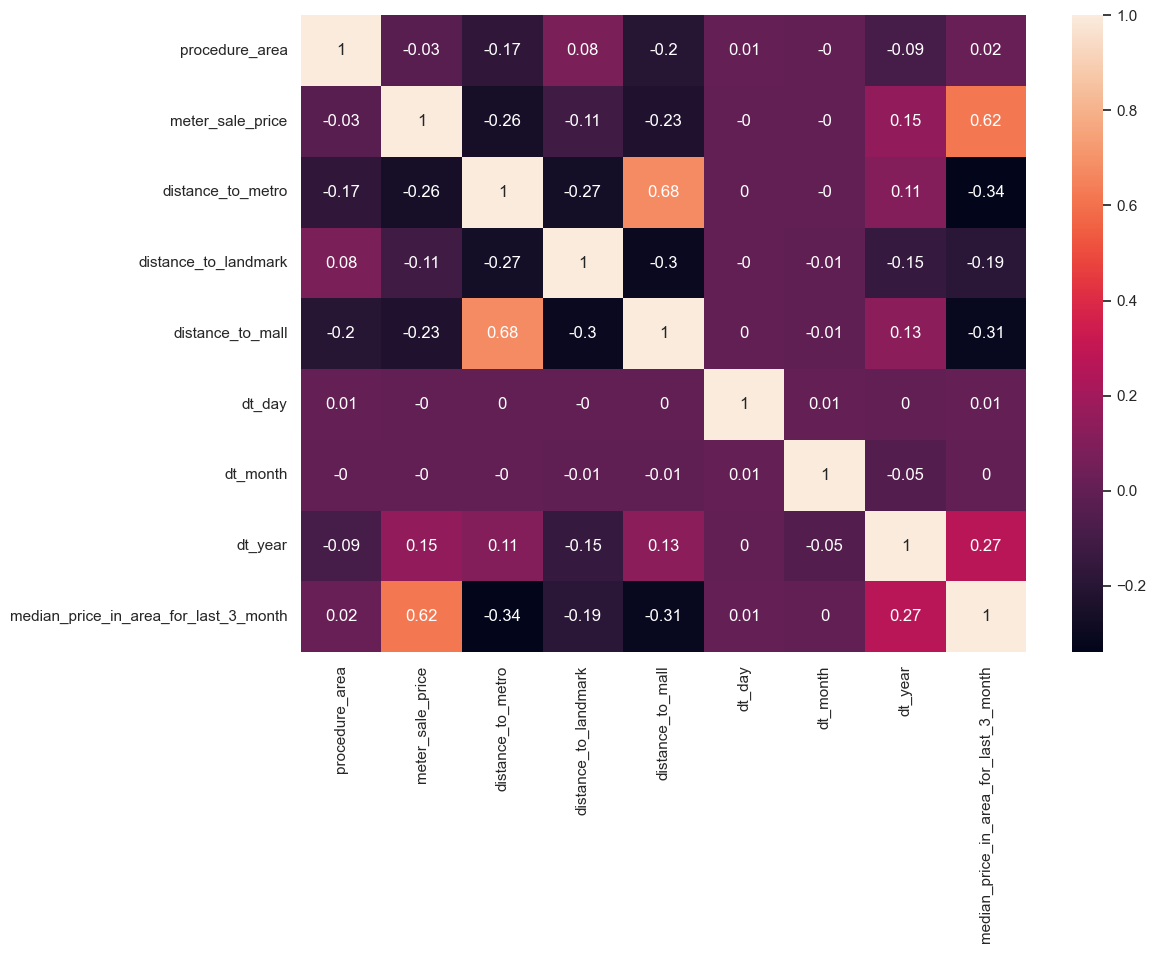

In [36]:
# Корреляция для числовых признаков

correlation_matrix = DF.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 3.3 Медианные значения

In [37]:
# Медианная цена по типу транзакции
means_by_trans_group_en = DF.groupby('trans_group_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_trans_group_en


,trans_group_en,meter_sale_price
0,Gifts,11822.486885
1,Mortgages,9386.736661
2,Sales,11779.395888


In [38]:
# Медианная цена по типу процедуры
means_by_procedure_name_en = DF.groupby('procedure_name_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_procedure_name_en


,procedure_name_en,meter_sale_price
0,Delayed Development,8016.036667
1,Delayed Lease to Own Modify,6922.160000
2,Delayed Lease to Own Registration,10796.851139
3,Delayed Mortgage,8526.062515
4,Delayed Sell,12533.809302
5,Delayed Sell Lease to Own Registration,10126.374500
6,Development Mortgage,7208.354568
7,Development Registration,7149.249847
8,Development Registration Pre-Registration,7721.949444
9,Grant,11809.580970


In [39]:
# Медианная цена по категориям недвижимости
means_by_property_sub_type_en = DF.groupby('property_sub_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_sub_type_en


,property_sub_type_en,meter_sale_price
0,Flat,11387.431009
1,Villa,9450.339963


In [40]:
# Медианная цена по категориям недвижимости
means_by_property_sub_type_en = DF.groupby('property_sub_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_sub_type_en


,property_sub_type_en,meter_sale_price
0,Flat,11387.431009
1,Villa,9450.339963


In [41]:
# Медианная цена по категориям назначения
means_by_property_usage_en = DF.groupby('property_usage_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_usage_en

,property_usage_en,meter_sale_price
0,Commercial,5146.230000
1,Other,NaN
2,Residential,11339.260625


In [42]:
# Медианная цена по категориям готовности проекта
means_by_reg_type_en = DF.groupby('reg_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_reg_type_en


,reg_type_en,meter_sale_price
0,Existing Properties,10654.293111
1,Off-Plan Properties,12768.079183


In [43]:
# Медианная цена по району
means_by_area_name_en = DF.groupby('area_name_en', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_area_name_en


,area_name_en,meter_sale_price
26,Madinat Dubai Almelaheyah,17750.711443
32,Um Hurair Second,17024.865000
8,Al Khairan First,16847.959423
12,Al Safouh Second,16406.681803
18,Al Wasl,15436.400373
19,Burj Khalifa,15391.583378
10,Al Kifaf,15020.657002
20,Business Bay,14230.836270
22,Hadaeq Sheikh Mohammed Bin Rashid,14086.119006
31,Palm Jumeirah,13017.064560


In [44]:
# Медианная цена по комнатности
means_by_rooms_en = DF.groupby('rooms_en', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_rooms_en


,rooms_en,meter_sale_price
5,6 B/R,11923.740000
10,PENTHOUSE,11778.227644
2,3 B/R,11579.391508
1,2 B/R,11563.227133
0,1 B/R,11267.585894
13,Studio,11084.241811
3,4 B/R,10540.366932
9,Office,9620.197500
11,Shop,8941.825000
4,5 B/R,8841.382088


In [45]:
# Медианная цена по присутствию машиноместа
means_by_has_parking = DF.groupby('has_parking', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_has_parking


,has_parking,meter_sale_price
1,1,11666.679210
0,0,9173.583575


### 3.2 Визуализация

In [47]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

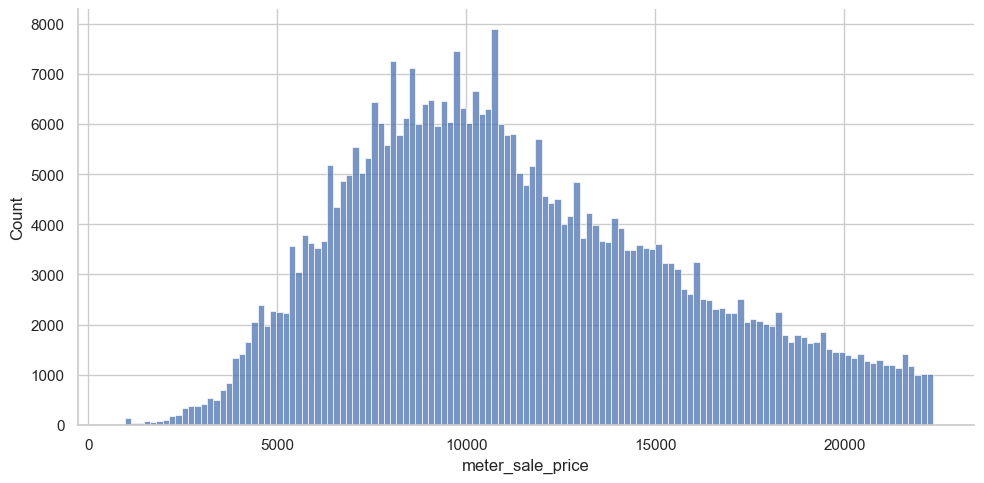

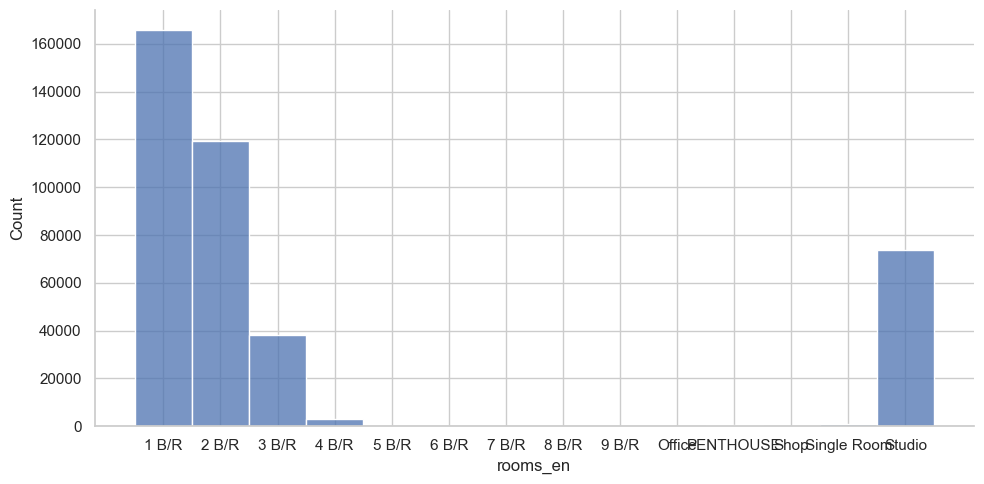

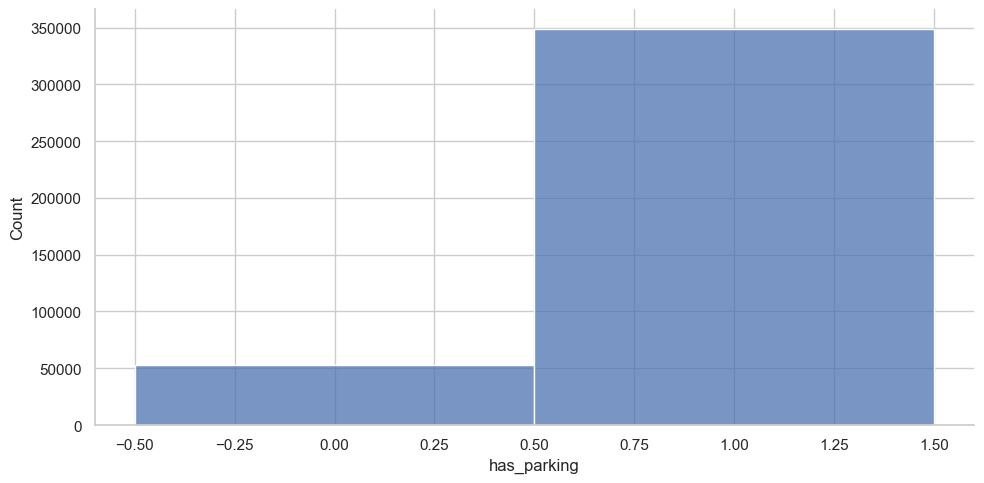

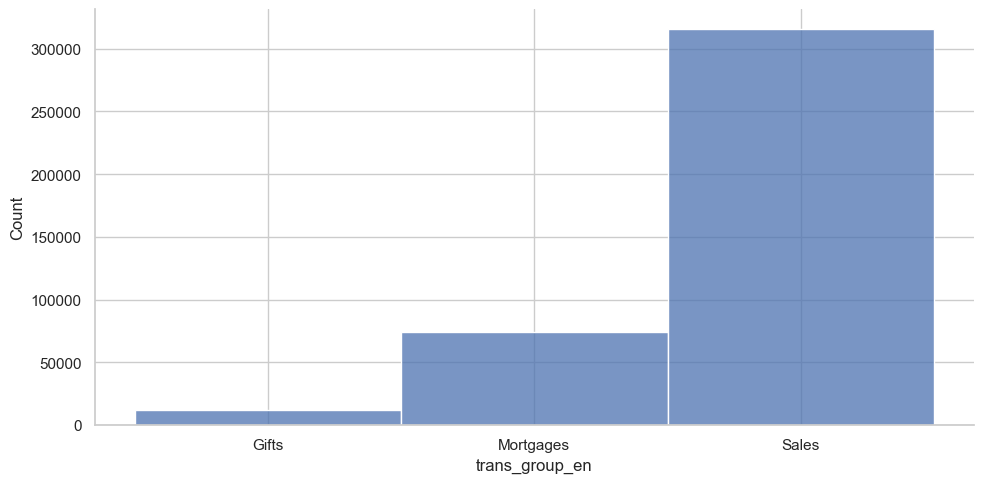

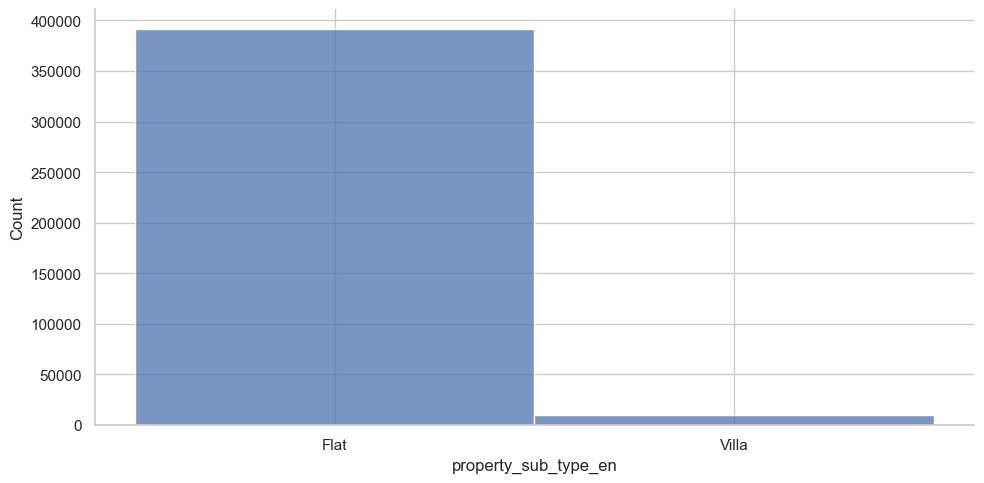

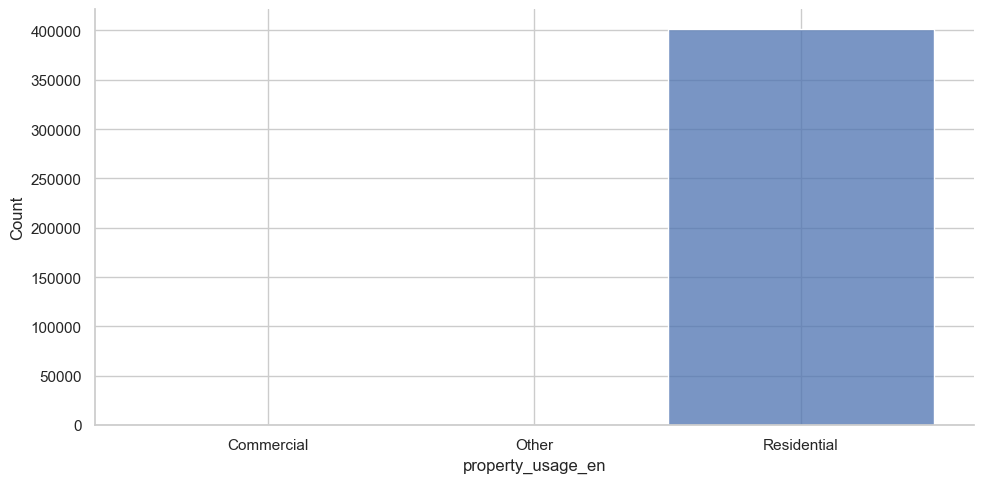

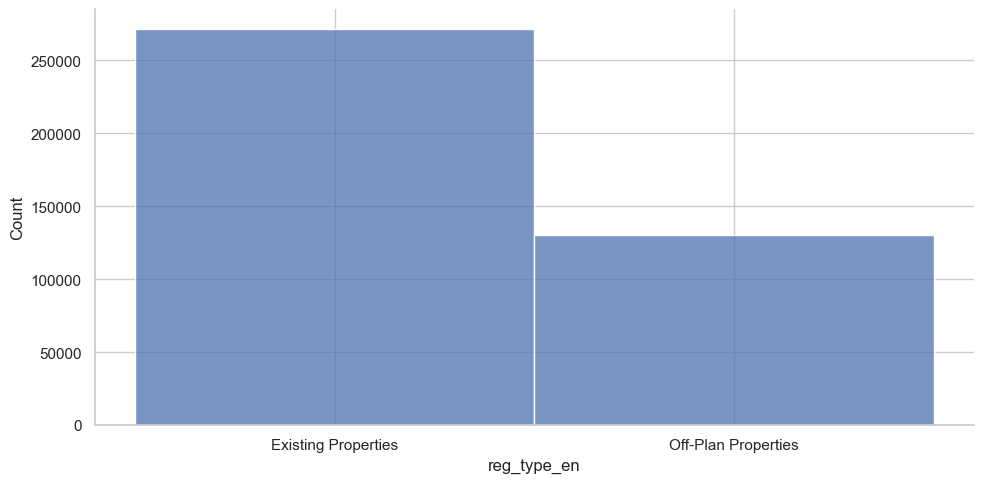

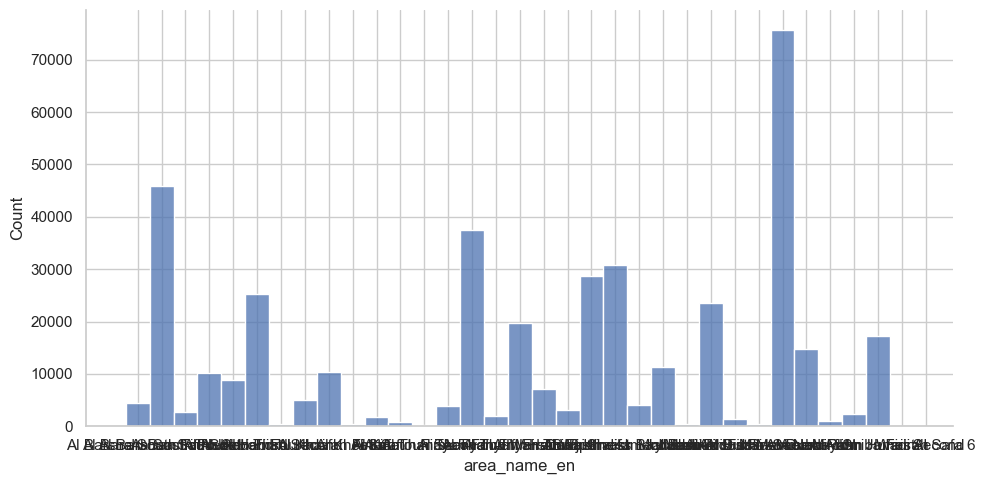

In [48]:
sns.set_style("whitegrid")

sns.displot(DF, x="meter_sale_price", kde=False, height=5, aspect=2)
sns.displot(DF, x="rooms_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="has_parking", kde=False, height=5, aspect=2)
sns.displot(DF, x="trans_group_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_sub_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_usage_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="reg_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="area_name_en", kde=False, height=5, aspect=2)

## 4. Модели машинного обучения

### 4.1 Подготовка данных


In [46]:
DF_numeric = DF.select_dtypes(include=np.number)

In [47]:
DF_categorical = DF.select_dtypes(include='category')

In [48]:
DF_categorical_dummues = pd.get_dummies(data=DF_categorical, drop_first=True)

In [49]:
DF_for_regression = DF_numeric.join(DF_categorical_dummues)

In [50]:
DF_for_regression

,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,dt_day,dt_month,dt_year,median_price_in_area_for_last_3_month,trans_group_en_Mortgages,...,rooms_en_6 B/R,rooms_en_7 B/R,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Studio,has_parking_1
5,172.53,10323.13,4019.665126,4079.460028,4736.895258,8,7,2007,2584.43,0,...,0,0,0,0,0,0,0,0,0,0
14,172.52,3494.60,4775.360648,3713.843980,5177.005216,21,12,2008,4745.02,0,...,0,0,0,0,0,0,0,0,0,0
16,172.49,5072.76,3612.487872,5561.889212,3255.336483,29,4,2008,6268.86,1,...,0,0,0,0,0,0,0,0,0,0
21,172.51,2625.29,3174.554143,5561.889212,3255.336483,25,2,2010,3866.12,0,...,0,0,0,0,0,0,0,0,0,0
32,207.13,5974.51,2476.639408,6285.874608,2511.644741,31,5,2016,7372.48,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479522,40.88,14652.64,5806.761909,3331.812612,5322.349522,29,3,2023,13768.90,0,...,0,0,0,0,0,0,0,0,1,1
479523,40.88,15631.12,5806.761909,3331.812612,5322.349522,23,2,2023,13904.50,0,...,0,0,0,0,0,0,0,0,1,1
479524,58.03,14147.85,5806.761909,3331.812612,5322.349522,5,4,2023,15145.45,0,...,0,0,0,0,0,0,0,0,1,1
479525,103.29,17609.53,2941.699306,6113.173101,5621.592002,29,3,2023,22063.06,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
list(DF_for_regression.columns)


['procedure_area',
 'meter_sale_price',
 'distance_to_metro',
 'distance_to_landmark',
 'distance_to_mall',
 'dt_day',
 'dt_month',
 'dt_year',
 'median_price_in_area_for_last_3_month',
 'trans_group_en_Mortgages',
 'trans_group_en_Sales',
 'procedure_name_en_Delayed Lease to Own Modify',
 'procedure_name_en_Delayed Lease to Own Registration',
 'procedure_name_en_Delayed Mortgage',
 'procedure_name_en_Delayed Sell',
 'procedure_name_en_Delayed Sell Lease to Own Registration',
 'procedure_name_en_Development Mortgage',
 'procedure_name_en_Development Registration',
 'procedure_name_en_Development Registration Pre-Registration',
 'procedure_name_en_Grant',
 'procedure_name_en_Grant Development',
 'procedure_name_en_Grant Pre-Registration',
 'procedure_name_en_Grant on Delayed Sell',
 'procedure_name_en_Lease Development Modify',
 'procedure_name_en_Lease Development Registration',
 'procedure_name_en_Lease Finance Modification',
 'procedure_name_en_Lease Finance Registration',
 'procedur

In [52]:
DF_for_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401675 entries, 5 to 479528
Columns: 209 entries, procedure_area to has_parking_1
dtypes: float64(6), int64(3), uint8(200)
memory usage: 115.3 MB


### 4.1 Decision Tree


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score   
from sklearn import tree

In [54]:
# Y – массив целевых значений для предсказаний
Y = np.array(DF_for_regression['meter_sale_price'])

# X – массив независимых переменных
X = DF_for_regression.drop('meter_sale_price', axis = 1)

X_list = list(DF_for_regression.columns)

X = np.array(X)

In [55]:
# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [56]:
# Вычислим допустимую ошибку как бенчмарк для модели
baseline_preds = x_test[:, X_list.index('meter_sale_price')]
baseline_errors = abs(baseline_preds - y_test)

print('Baseline error: ', round(np.mean(baseline_errors), 2))


Baseline error:  8977.56


In [57]:
# Создадим random forest модель
dt = DecisionTreeRegressor(random_state = 42)

# Тренировка модели
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
# Сделаем предсказания
y_pred = dt.predict(x_test)

In [59]:
# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Testing performance:')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))

Testing performance:
RMSE: 3025.79
R2: 0.52
MAE: 1858.05


#### Визуализация

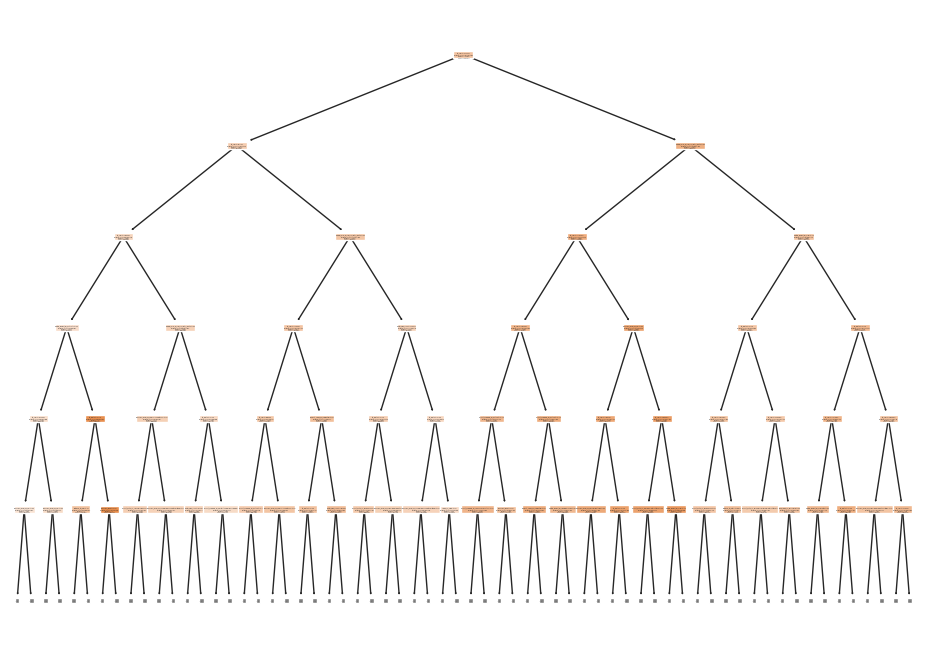

In [70]:
#fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names = X_list,  
                   filled=True,
                   max_depth = 5,
                  )

In [63]:
plt.show()

In [73]:
import graphviz

X_feature_list = list(DF_for_regression.drop('meter_sale_price', axis = 1).columns)

# DOT data
dot_data = tree.export_graphviz(dt, 
                                out_file=None, 
                                feature_names = X_feature_list,  
                                filled=True,
                                max_depth = 5,
                               )

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

PermissionError: [Errno 13] Permission denied: PosixPath('dot')

In [77]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt, 
    #out_file=None, 
    feature_names = X_feature_list,  
    filled=True,
    max_depth = 5,
    out_file = 'small_tree.dot', 
    rounded = True, 
    precision = 1)

### 4.2 Catboost
CatBoost — относительно новый алгоритм машинного обучения с открытым исходным кодом, разработанный в 2017 году компанией Яндекс. Яндекс — российский аналог Google, работающий в рамках поисковых и информационных сервисов.

Одним из основных преимуществ CatBoost является его способность интегрировать различные типы данных, такие как изображения, аудио или текстовые функции, в одну структуру. Но CatBoost также предлагает своеобразный способ обработки категориальных данных, требующий минимального преобразования категориальных признаков, в отличие от большинства других алгоритмов машинного обучения, которые не могут обрабатывать нечисловые значения. С точки зрения разработки функций преобразование нечислового состояния в числовые значения может быть очень нетривиальной и утомительной задачей, и CatBoost делает этот шаг устаревшим.

CatBoost основан на теории деревьев решений и повышения градиента.Основная идея бустинга состоит в том, чтобы последовательно объединить множество слабых моделей (модель работает немного лучше, чем случайный случай) и, таким образом, с помощью жадного поиска создать сильную конкурентную прогностическую модель.Поскольку повышение градиента соответствует деревьям решений последовательно, подобранные деревья будут учиться на ошибках прежних деревьев и, следовательно, уменьшать ошибки. Этот процесс добавления новой функции к существующим продолжается до тех пор, пока выбранная функция потерь не перестанет быть минимизированной.

In [432]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,...,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,dt_day,dt_month,dt_year,median_price_in_area_for_last_3_month
5,Sales,Sell,2007-07-08,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,...,0,172.53,10323.13,4019.665126,4079.460028,4736.895258,8,7,2007,2584.43
14,Sales,Sell,2008-12-21,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,...,0,172.52,3494.60,4775.360648,3713.843980,5177.005216,21,12,2008,4745.02
16,Mortgages,Mortgage Registration,2008-04-29,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 2,Sports City Swimming Academy,Nakheel Metro Station,...,0,172.49,5072.76,3612.487872,5561.889212,3255.336483,29,4,2008,6268.86
21,Sales,Lease to Own Registration,2010-02-25,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 2,Sports City Swimming Academy,Damac Properties,...,0,172.51,2625.29,3174.554143,5561.889212,3255.336483,25,2,2010,3866.12
32,Mortgages,Mortgage Registration,2016-05-31,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 1,Sports City Swimming Academy,Damac Properties,...,0,207.13,5974.51,2476.639408,6285.874608,2511.644741,31,5,2016,7372.48


In [433]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

X = DF.drop(columns=['meter_sale_price', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
Y = DF['meter_sale_price']


In [57]:
from catboost import CatBoostRegressor, Pool, EFstrType

import shap


In [73]:
shap.initjs()

In [437]:
# Сформируем модель для регрессии
cbr = CatBoostRegressor(n_estimators=300,
                        loss_function='RMSE',
                        learning_rate=0.6,
                        depth=10, 
                        task_type='CPU',
                        random_state=1,
                        verbose=False,
                       )

# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# При помощи Pool переведем параметры в формат, подходящий для CatBoost
pool_train = Pool(x_train, y_train,
                  cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

pool_test = Pool(x_test, cat_features = [
                        'trans_group_en', 
                        'procedure_name_en', 
                        'property_sub_type_en',
                        'property_usage_en',
                        'reg_type_en',
                        'area_name_en',
                        'master_project_en',
                        'rooms_en',
                        'has_parking',
                  ])

# Проведем обучение модели
cbr.fit(pool_train)

# Проведем предсказания
y_pred = cbr.predict(pool_test)

In [446]:
# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))

Testing performance
RMSE: 2353.30
R2: 0.71
MAE: 1639.62


In [447]:
Y.describe()

count    401675.000000
mean      11339.229789
std        4361.623113
min         799.910000
25%        8070.000000
50%       10689.860000
75%       14244.795000
max       22350.690000
Name: meter_sale_price, dtype: float64

##### Оценка модели
Видно, что RMSE ниже стандартного отклонения, а R2 достигает 74%, что является высокими показателями. Модель эффективна.

##### Значимость переменных


In [448]:
# Используем DALEX

import dalex as dx

In [449]:
# Оценка качества модели

exp_catboost = dx.Explainer(cbr, x_test, y_test, verbose=False, label="catboost")
exp_catboost.model_performance()

,mse,rmse,r2,mae,mad
catboost,5.538040e+06,2353.304161,0.709655,1639.622733,1103.271765


In [450]:
# Важность параметров на целевую переменную

exp_catboost.model_parts().plot()

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



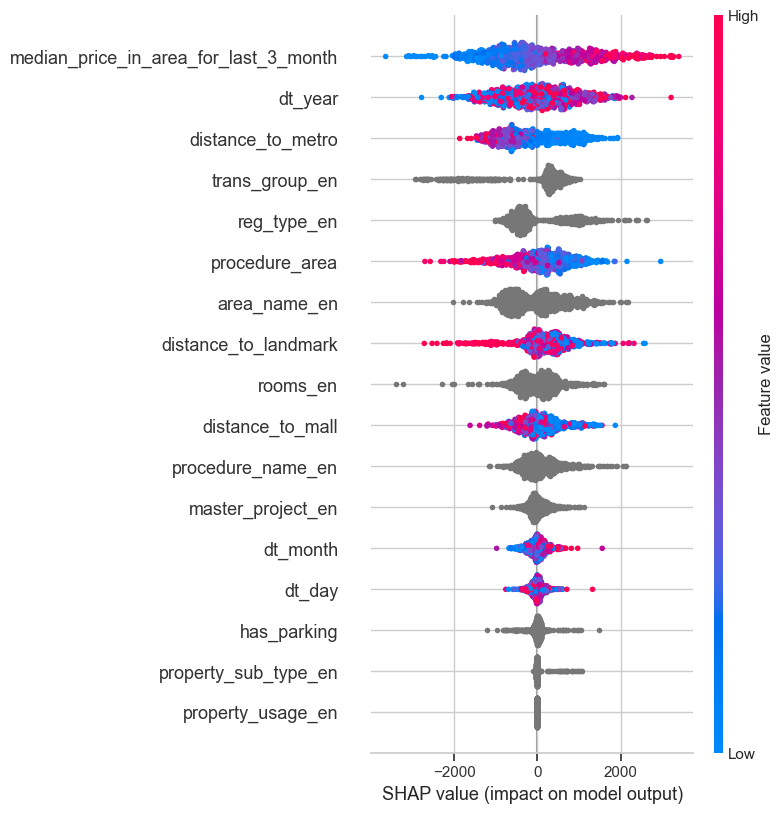

In [451]:
exp_catboost.model_parts(type='shap_wrapper', shap_explainer_type="TreeExplainer").plot()

---

### 4.3 Random Forest

#### Разработка модели

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

import graphviz
import pydot

In [63]:
# Возьмем датасет, который мы ранее подготовили. В том числе сделали one-hot коддинг категориальных переменных.

DF_for_regression

,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,dt_day,dt_month,dt_year,median_price_in_area_for_last_3_month,trans_group_en_Mortgages,...,rooms_en_6 B/R,rooms_en_7 B/R,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Studio,has_parking_1
5,172.53,10323.13,4019.665126,4079.460028,4736.895258,8,7,2007,2584.43,0,...,0,0,0,0,0,0,0,0,0,0
14,172.52,3494.60,4775.360648,3713.843980,5177.005216,21,12,2008,4745.02,0,...,0,0,0,0,0,0,0,0,0,0
16,172.49,5072.76,3612.487872,5561.889212,3255.336483,29,4,2008,6268.86,1,...,0,0,0,0,0,0,0,0,0,0
21,172.51,2625.29,3174.554143,5561.889212,3255.336483,25,2,2010,3866.12,0,...,0,0,0,0,0,0,0,0,0,0
32,207.13,5974.51,2476.639408,6285.874608,2511.644741,31,5,2016,7372.48,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479522,40.88,14652.64,5806.761909,3331.812612,5322.349522,29,3,2023,13768.90,0,...,0,0,0,0,0,0,0,0,1,1
479523,40.88,15631.12,5806.761909,3331.812612,5322.349522,23,2,2023,13904.50,0,...,0,0,0,0,0,0,0,0,1,1
479524,58.03,14147.85,5806.761909,3331.812612,5322.349522,5,4,2023,15145.45,0,...,0,0,0,0,0,0,0,0,1,1
479525,103.29,17609.53,2941.699306,6113.173101,5621.592002,29,3,2023,22063.06,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# Y – массив целевых значений для предсказаний
Y = np.array(DF_for_regression['meter_sale_price'])

# X – массив независимых переменных
X = DF_for_regression.drop('meter_sale_price', axis = 1)

X_list = list(DF_for_regression.columns)

X = np.array(X)

In [71]:
list(DF_for_regression.drop('meter_sale_price', axis = 1).columns)


['procedure_area',
 'distance_to_metro',
 'distance_to_landmark',
 'distance_to_mall',
 'dt_day',
 'dt_month',
 'dt_year',
 'median_price_in_area_for_last_3_month',
 'trans_group_en_Mortgages',
 'trans_group_en_Sales',
 'procedure_name_en_Delayed Lease to Own Modify',
 'procedure_name_en_Delayed Lease to Own Registration',
 'procedure_name_en_Delayed Mortgage',
 'procedure_name_en_Delayed Sell',
 'procedure_name_en_Delayed Sell Lease to Own Registration',
 'procedure_name_en_Development Mortgage',
 'procedure_name_en_Development Registration',
 'procedure_name_en_Development Registration Pre-Registration',
 'procedure_name_en_Grant',
 'procedure_name_en_Grant Development',
 'procedure_name_en_Grant Pre-Registration',
 'procedure_name_en_Grant on Delayed Sell',
 'procedure_name_en_Lease Development Modify',
 'procedure_name_en_Lease Development Registration',
 'procedure_name_en_Lease Finance Modification',
 'procedure_name_en_Lease Finance Registration',
 'procedure_name_en_Lease to Ow

In [65]:
# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [73]:
np.save('x_test.npy', x_test)

In [74]:
DF_for_regression.drop('meter_sale_price', axis = 1).columns

Index(['procedure_area', 'distance_to_metro', 'distance_to_landmark',
       'distance_to_mall', 'dt_day', 'dt_month', 'dt_year',
       'median_price_in_area_for_last_3_month', 'trans_group_en_Mortgages',
       'trans_group_en_Sales',
       ...
       'rooms_en_6 B/R', 'rooms_en_7 B/R', 'rooms_en_8 B/R', 'rooms_en_9 B/R',
       'rooms_en_Office', 'rooms_en_PENTHOUSE', 'rooms_en_Shop',
       'rooms_en_Single Room', 'rooms_en_Studio', 'has_parking_1'],
      dtype='object', length=208)

In [75]:
# Вычислим допустимую ошибку как бенчмарк для модели
baseline_preds = x_test[:, X_list.index('meter_sale_price')]
baseline_errors = abs(baseline_preds - y_test)

print('Baseline error: ', round(np.mean(baseline_errors), 2))


Baseline error:  8977.56


In [460]:
# Создадим random forest модель
rf = RandomForestRegressor()

# Тренировка модели
rf.fit(x_train, y_train)

RandomForestRegressor()

In [461]:
# Сделаем предсказания
y_pred = rf.predict(x_test)

In [462]:
# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Testing performance:')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))

Testing performance:
RMSE: 2292.69
R2: 0.72
MAE: 1483.92


In [463]:
rf_estimators = rf.estimators_
rf_depths = [estimator.get_depth() for estimator in rf_estimators]

print('Depth of Tree:')
print('Estimators: {:.2f}'.format(len(rf_estimators)))
print('Max Depth: {:.2f}'.format(max(rf_depths)))


Depth of Tree:
Estimators: 100.00
Max Depth: 64.00


#### Кроссвалидация и поиск оптимальных гиперпараметров

In [464]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

- Set *ntree* in R equal to *n_estimators* in Python
- Set *mtry* in R equal to *max_features* in Python
- Set *nodesize* in R equal to *min_samples_leaf* in Python
- Set class *weight* as default value in R and in Python. In R, the default value is NULL. In Python, the default value is None.
- Set *sample size* in R equal to total *number of rows* in training data, which is the default setting in Python.
- Set *replace* in R equal to *bootstrap* in Python, i.e. both are True or both are False.

In [465]:
## Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]
n_estimators = [250]

## MTry = max_features
max_features = [float(x) for x in np.linspace(0.3, 1.0, num = 3)]
max_features.append('sqrt')
max_features.append('log2')

## Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(40, 60, num = 3)]
#max_depth.append(None)
max_depth = [60]

## Minimum number of samples required to split a node
#min_samples_split = [5, 10]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    #'min_samples_split': min_samples_split,
    #'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(params)

{'n_estimators': [250], 'max_depth': [60], 'max_features': [0.3, 0.6499999999999999, 1.0, 'sqrt', 'log2'], 'bootstrap': [True, False]}


In [157]:
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 3, n_jobs = -1, verbose = 3)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, cv = 3, verbose=4, random_state=42, n_jobs = -1)

rf_random.fit(x_train, y_train)

Best hyperparams:
- bootstrap = True,
- max_depth = 60,
- max_features = 1.0,
- n_estimators = 100,
- random_state = 42

In [129]:
rf_best_params = grid_search.best_params_

#### Построение модели с оптимальными параметрами

In [58]:
import joblib


In [ ]:
# Создадим random forest модель на основе лучших гиперпараметров

rf_best = RandomForestRegressor(
    bootstrap = True,
    max_depth = 60,
    max_features = 1.0,
    n_estimators = 250,
    random_state = 42
)

# Тренировка модели
rf_best.fit(x_train, y_train)

In [59]:
rf_best = joblib.load('./models/random_forest.joblib')

In [72]:
# Сделаем предсказания
y_pred_best = rf_best.predict(x_test)

In [73]:
# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred_best)))
r2 = r2_score(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)

print('Testing performance:')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))

Testing performance:
RMSE: 2286.85
R2: 0.73
MAE: 1479.44


In [74]:
rf_best_estimators = rf_best.estimators_
rf_best_depths = [estimator.get_depth() for estimator in rf_best_estimators]

print('Depth of Tree:')
print('Estimators: {:.2f}'.format(len(rf_best_estimators)))
print('Max Depth: {:.2f}'.format(max(rf_best_depths)))


Depth of Tree:
Estimators: 250.00
Max Depth: 60.00


----

#### Экспорт модели

In [470]:
import os
import joblib

In [471]:
# save
joblib.dump(rf_best, "./models/random_forest.joblib", compress=3)

['./models/random_forest.joblib']

----

#### Значимость переменных

Text(0.5, 0, 'Variable Importance')

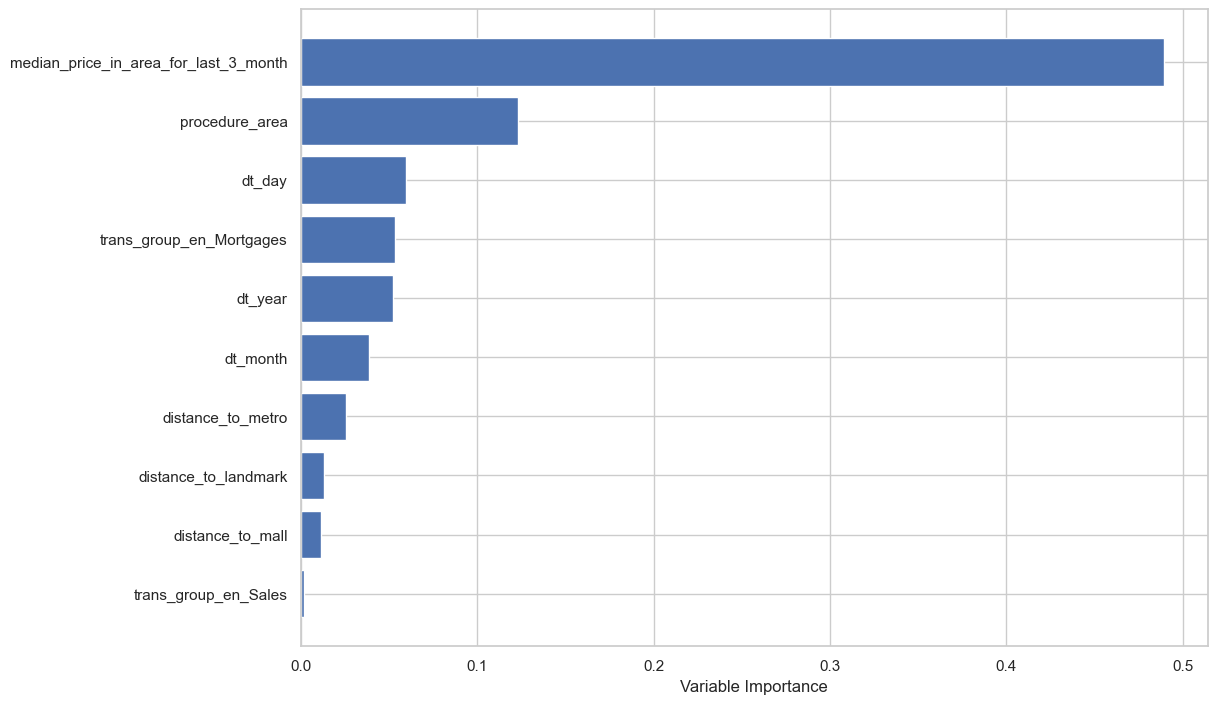

In [472]:
rf_feature_importances = rf_best.feature_importances_[0:10]
rf_feature_importances_sorted = rf_feature_importances.argsort()

plt.barh(
    DF_for_regression.drop('meter_sale_price', axis = 1).columns[rf_feature_importances_sorted],
    rf_feature_importances[rf_feature_importances_sorted])
plt.xlabel('Variable Importance')

In [76]:
fn = [
            'procedure_area',
            'distance_to_metro',
            'distance_to_landmark',
            'distance_to_mall',
            'dt_day',
            'dt_month',
            'dt_year',
            'median_price_in_area_for_last_3_month',
            'trans_group_en_Mortgages',
            'trans_group_en_Sales',
            'procedure_name_en_Delayed Lease to Own Modify',
            'procedure_name_en_Delayed Lease to Own Registration',
            'procedure_name_en_Delayed Mortgage',
            'procedure_name_en_Delayed Sell',
            'procedure_name_en_Delayed Sell Lease to Own Registration',
            'procedure_name_en_Development Mortgage',
            'procedure_name_en_Development Registration',
            'procedure_name_en_Development Registration Pre-Registration',
            'procedure_name_en_Grant',
            'procedure_name_en_Grant Development',
            'procedure_name_en_Grant Pre-Registration',
            'procedure_name_en_Grant on Delayed Sell',
            'procedure_name_en_Lease Development Modify',
            'procedure_name_en_Lease Development Registration',
            'procedure_name_en_Lease Finance Modification',
            'procedure_name_en_Lease Finance Registration',
            'procedure_name_en_Lease to Own Modify',
            'procedure_name_en_Lease to Own Registration',
            'procedure_name_en_Lease to Own Registration Pre-Registration',
            'procedure_name_en_Lease to Own Transfer',
            'procedure_name_en_Lease to Own on Development Modification',
            'procedure_name_en_Lease to Own on Development Registration',
            'procedure_name_en_Modify Delayed Mortgage ',
            'procedure_name_en_Modify Development Mortgage',
            'procedure_name_en_Modify Mortgage',
            'procedure_name_en_Modify Mortgage Pre-Registration',
            'procedure_name_en_Mortgage Pre-Registration',
            'procedure_name_en_Mortgage Registration',
            'procedure_name_en_Mortgage Transfer',
            'procedure_name_en_Mortgage Transfer Pre-Registration',
            'procedure_name_en_Sale On Payment Plan',
            'procedure_name_en_Sell',
            'procedure_name_en_Sell - Pre registration',
            'procedure_name_en_Sell Development',
            'procedure_name_en_Sell Development - Pre Registration',
            'procedure_name_en_Transfer Development Mortgage',
            'property_sub_type_en_Villa',
            'property_usage_en_Other',
            'property_usage_en_Residential',
            'reg_type_en_Off-Plan Properties',
            'area_name_en_Al Barsha South Fourth',
            'area_name_en_Al Barshaa South Second',
            'area_name_en_Al Barshaa South Third',
            'area_name_en_Al Hebiah First',
            'area_name_en_Al Hebiah Fourth',
            'area_name_en_Al Hebiah Second',
            'area_name_en_Al Jadaf',
            'area_name_en_Al Khairan First',
            'area_name_en_Al Kheeran',
            'area_name_en_Al Kifaf',
            'area_name_en_Al Safouh First',
            'area_name_en_Al Safouh Second',
            'area_name_en_Al Thanayah Fourth',
            'area_name_en_Al Thanyah Fifth',
            'area_name_en_Al Thanyah First',
            'area_name_en_Al Thanyah Third',
            'area_name_en_Al Warsan First',
            'area_name_en_Al Wasl',
            'area_name_en_Burj Khalifa',
            'area_name_en_Business Bay',
            'area_name_en_Dubai Investment Park First',
            'area_name_en_Hadaeq Sheikh Mohammed Bin Rashid',
            'area_name_en_Jabal Ali',
            'area_name_en_Jabal Ali First',
            'area_name_en_Jabal Ali Industrial Second',
            'area_name_en_Madinat Dubai Almelaheyah',
            'area_name_en_Marsa Dubai',
            "area_name_en_Me'Aisem First",
            'area_name_en_Mirdif',
            'area_name_en_Nad Al Shiba First',
            'area_name_en_Palm Jumeirah',
            'area_name_en_Um Hurair Second',
            'area_name_en_Wadi Al Safa 6',
            'master_project_en_Arabian Ranches - Saheel',
            'master_project_en_Arjan',
            'master_project_en_Burj Khalifa',
            'master_project_en_Business Bay',
            'master_project_en_City Walk',
            'master_project_en_Culture Village',
            'master_project_en_DMCC-EZ2',
            'master_project_en_DUBAI HILLS',
            'master_project_en_DUBAI HILLS - CLUB VILLAS',
            'master_project_en_DUBAI HILLS - GOLF GROVE',
            'master_project_en_DUBAI HILLS - MAPLE 1',
            'master_project_en_DUBAI HILLS - MAPLE 2',
            'master_project_en_DUBAI HILLS - MAPLE 3',
            'master_project_en_DUBAI HILLS - PARK',
            'master_project_en_DUBAI HILLS - SIDRA 1',
            'master_project_en_Discovery Gardens',
            'master_project_en_Down Town Jabal Ali',
            'master_project_en_Dubai Health Care City Phase 1',
            'master_project_en_Dubai Health Care City Phase 2',
            'master_project_en_Dubai Investment Park First',
            'master_project_en_Dubai Marina',
            'master_project_en_Dubai Maritime City',
            'master_project_en_Dubai Sports City',
            'master_project_en_Dubai Studio City',
            'master_project_en_Dubiotech',
            "master_project_en_Emaar's Street Of Dreams",
            'master_project_en_Emirates Hills',
            'master_project_en_Festival City',
            'master_project_en_HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7',
            'master_project_en_International City Phase 1',
            'master_project_en_International Media Production Zone',
            'master_project_en_Jumeirah Golf',
            'master_project_en_Jumeirah Heights',
            'master_project_en_Jumeirah Islands',
            'master_project_en_Jumeirah Lakes Towers',
            'master_project_en_Jumeirah Park',
            'master_project_en_Jumeirah Village Circle',
            'master_project_en_Jumeirah Village Triangle',
            'master_project_en_Jumeriah Beach Residence  - JBR',
            'master_project_en_Lakes - Forat',
            'master_project_en_Lakes - Ghadeer',
            'master_project_en_Lakes - Hattan II',
            'master_project_en_Lakes - Maeen',
            'master_project_en_Meadows 1',
            'master_project_en_Meadows 2',
            'master_project_en_Meadows 4',
            'master_project_en_Meadows 5',
            'master_project_en_Meadows 6',
            'master_project_en_Meadows 7',
            'master_project_en_Meadows 8',
            'master_project_en_Meadows 9',
            'master_project_en_Meydan',
            'master_project_en_Mina Rashid',
            'master_project_en_Motor City',
            'master_project_en_Palm Jumeirah',
            'master_project_en_Springs - 1',
            'master_project_en_Springs - 2',
            'master_project_en_Springs - 3',
            'master_project_en_Springs - 4',
            'master_project_en_Springs - 5',
            'master_project_en_Springs - 6',
            'master_project_en_Springs - 7',
            'master_project_en_TECOM Site A',
            'master_project_en_TECOM Site B',
            'master_project_en_TECOM Site C',
            'master_project_en_The Greens',
            'master_project_en_The Lagoons',
            'master_project_en_Uptown Mirdif',
            'master_project_en_Wasl 1',
            'master_project_en_Wasl Gate',
            'nearest_landmark_en_Burj Khalifa',
            'nearest_landmark_en_Downtown Dubai',
            'nearest_landmark_en_Dubai International Airport',
            'nearest_landmark_en_Expo 2020 Site',
            'nearest_landmark_en_Global Village',
            'nearest_landmark_en_IMG World Adventures',
            'nearest_landmark_en_Motor City',
            'nearest_landmark_en_Sports City Swimming Academy',
            'nearest_metro_en_Al Jadaf Metro Station',
            'nearest_metro_en_Al Jafiliya Metro Station',
            'nearest_metro_en_Al Sufouh',
            'nearest_metro_en_Buj Khalifa Dubai Mall Metro Station',
            'nearest_metro_en_Business Bay Metro Station',
            'nearest_metro_en_Creek Metro Station',
            'nearest_metro_en_DANUBE Metro Station',
            'nearest_metro_en_Damac Properties',
            'nearest_metro_en_Dubai Internet City',
            'nearest_metro_en_Dubai Marina',
            'nearest_metro_en_ENERGY Metro Station',
            'nearest_metro_en_Emirates Metro Station',
            'nearest_metro_en_First Abu Dhabi Bank Metro Station',
            'nearest_metro_en_Harbour Tower',
            'nearest_metro_en_Healthcare City Metro Station',
            'nearest_metro_en_Ibn Battuta Metro Station',
            'nearest_metro_en_Jumeirah Beach Resdency',
            'nearest_metro_en_Jumeirah Beach Residency',
            'nearest_metro_en_Jumeirah Lakes Towers',
            'nearest_metro_en_Knowledge Village',
            'nearest_metro_en_Marina Mall Metro Station',
            'nearest_metro_en_Marina Towers',
            'nearest_metro_en_Mina Seyahi',
            'nearest_metro_en_Nakheel Metro Station',
            'nearest_metro_en_Noor Bank Metro Station',
            'nearest_metro_en_Palm Jumeirah',
            'nearest_metro_en_Rashidiya Metro Station',
            'nearest_metro_en_Sharaf Dg Metro Station',
            'nearest_metro_en_UAE Exchange Metro Station',
            'nearest_mall_en_Dubai Mall',
            'nearest_mall_en_Ibn-e-Battuta Mall',
            'nearest_mall_en_Mall of the Emirates',
            'nearest_mall_en_Marina Mall',
            'rooms_en_2 B/R',
            'rooms_en_3 B/R',
            'rooms_en_4 B/R',
            'rooms_en_5 B/R',
            'rooms_en_6 B/R',
            'rooms_en_7 B/R',
            'rooms_en_8 B/R',
            'rooms_en_9 B/R',
            'rooms_en_Office',
            'rooms_en_PENTHOUSE',
            'rooms_en_Shop',
            'rooms_en_Single Room',
            'rooms_en_Studio',
            'has_parking_1',
    ]

In [60]:
explainer = shap.TreeExplainer(rf_best)

In [85]:
x_refs = x_test[1:100]

In [86]:
shap_values = explainer.shap_values(x_refs)

In [87]:
explanation = explainer(x_refs)

In [88]:
explanation.feature_names = fn

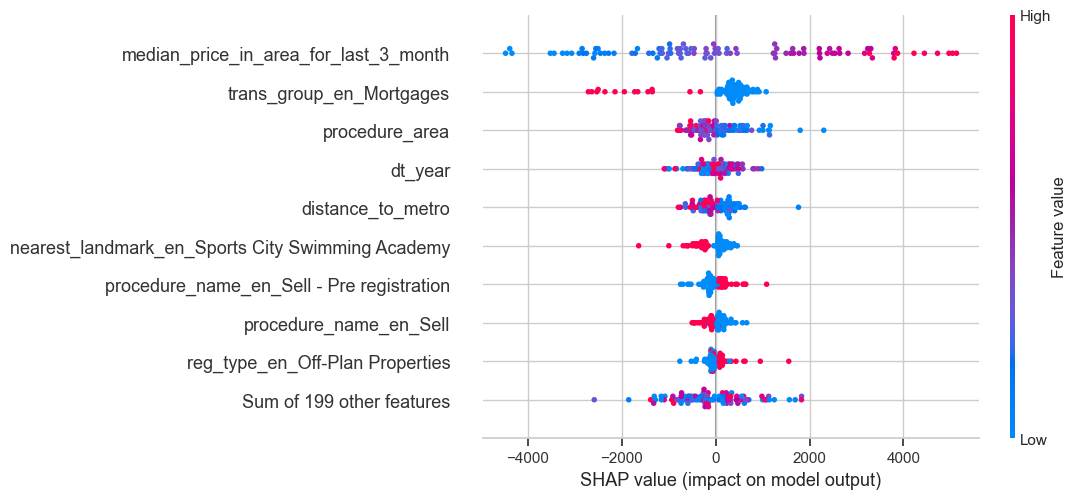

In [89]:
#shap.force_plot(explainer.expected_value, shap_values, x_test[1:5], feature_names = fn)
shap.plots.beeswarm(explanation)

In [68]:
fp = shap.force_plot(explainer.expected_value[0], shap_values[0], props, feature_names = fn)
pb = shap.bar_plot(shap_values[0], feature_names = fn)
pw = shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], feature_names = fn)


NameError: name 'props' is not defined

In [ ]:
x_test_summary = shap.sample(x_test, 1000)

shap_values = explainer.shap_values(x_test_summary)

In [ ]:
shap.summary_plot(rf_shap_values, x_test_summary)

In [ ]:
exp_rf_best = dx.Explainer(rf_best, x_test, y_test, verbose=False, label="rf_best")
exp_rf_best.model_performance()

In [134]:
exp_rf_best.model_parts().plot()

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning:

X has f

KeyboardInterrupt: 

In [ ]:
mp = exp_rf_best.model_parts(type='shap_wrapper', shap_explainer_type="TreeExplainer")

#### Визуализация

In [861]:
X_list = list(DF_for_regression.drop('meter_sale_price', axis = 1).columns)


In [863]:
# Экспорт визуализаци дерева решений. Файл большой, поэтому визуализировать тяжело.
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

In [862]:
# Сделаем модель поменьше для визуализации
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [856]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

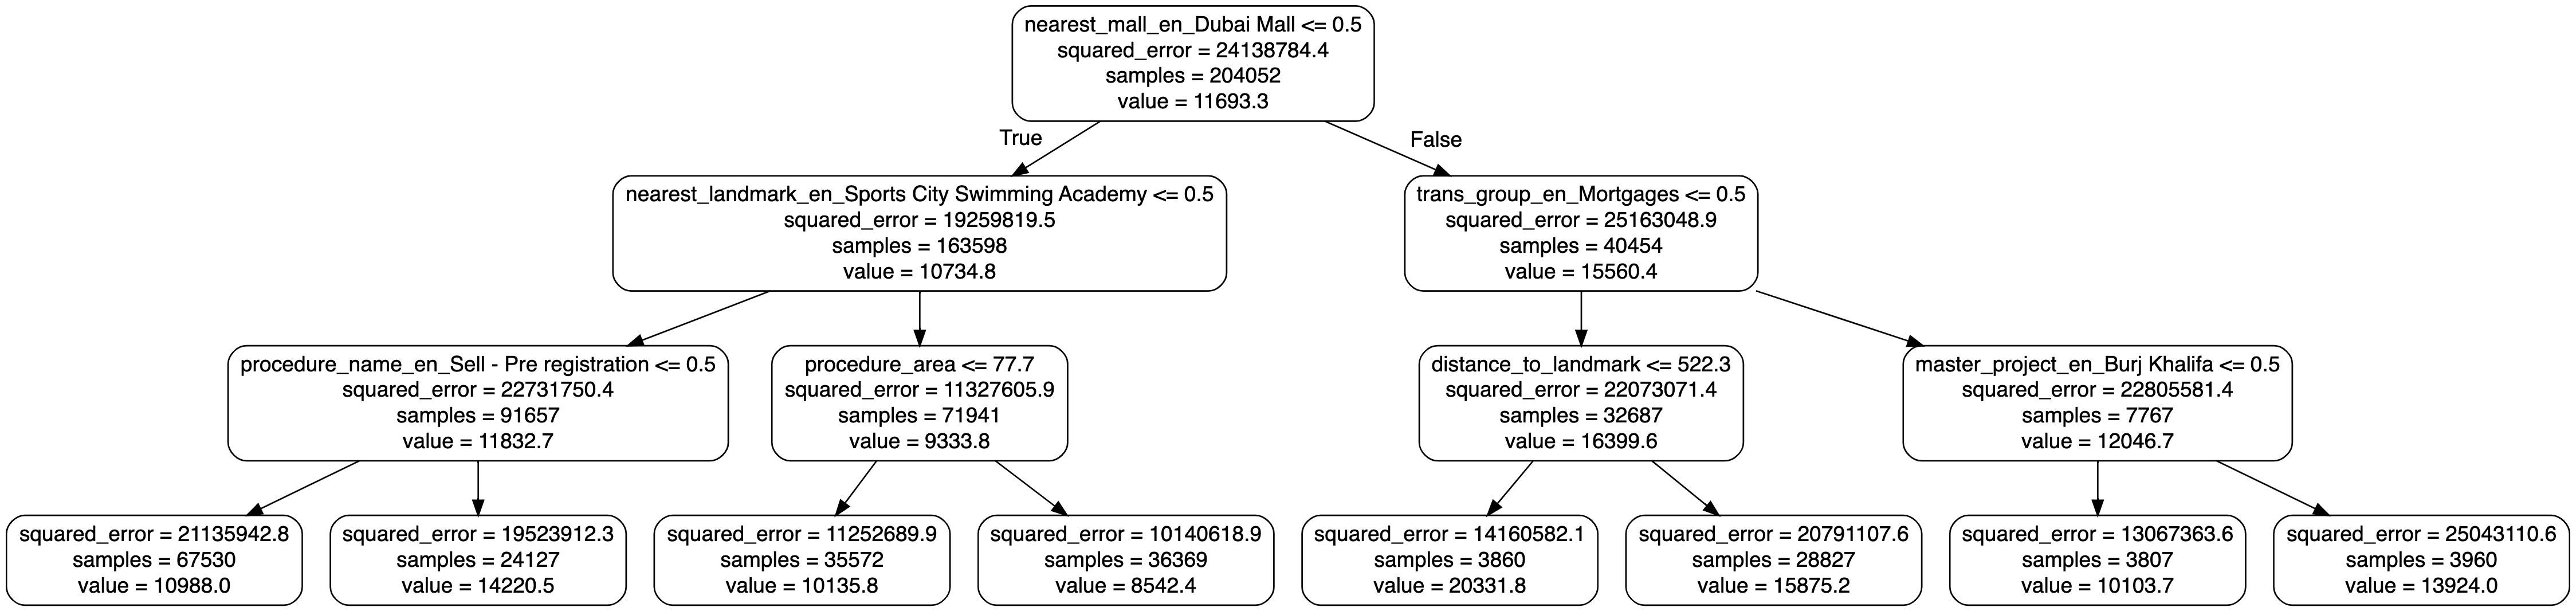

### 4.4 Neural Network на основе библиотеки Keras


In [618]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.optimizers import SGD

In [619]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

#X = DF.drop(columns=['actual_worth', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
X = DF[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']].values
Y = DF['meter_sale_price'].values

In [620]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [368]:
# Сформируем датасеты для тренировки модели и предсказания

#data = DF.drop(columns=['instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])

#train, test = train_test_split(data, test_size=0.2)

In [621]:
# Стандартизация числовых переменных

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


#x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])
#x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])


In [370]:
# convert the categorical variables to one-hot encoding
#x_train = pd.get_dummies(x_train, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])
#x_test = pd.get_dummies(x_test, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])

In [622]:
x_train

array([[-0.78309655, -0.69024648, -1.12692024, -0.64581018],
       [ 2.85743077, -0.0793665 , -0.12866188,  0.14043177],
       [ 0.4193921 , -0.65517231, -1.42436912, -1.02212657],
       ...,
       [-1.05136582, -0.69024648, -1.12692024, -0.64581018],
       [ 1.22212177,  0.3712466 , -0.78031913,  0.89302409],
       [-1.23159742, -0.28143978,  1.36238861, -0.36544893]])

In [623]:
# create the neural network model
model = Sequential()
model.add(Dense(400, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
#model.add(Dense(4, activation='softmax'))
#model.add(Dense(1))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))


In [624]:
y_train

array([17246.91,  3646.63, 19022.39, ..., 20920.42,  5193.8 , 10160.56])

In [625]:
# compile the model

#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])


In [626]:
# train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
11227/11227 [==============================] - 15s 1ms/step - loss: 2.5102 - mse: 105994872.0000 - val_loss: 0.7351 - val_mse: 72003744.0000
Epoch 2/25
11227/11227 [==============================] - 14s 1ms/step - loss: 0.4951 - mse: 57588312.0000 - val_loss: 0.3529 - val_mse: 46973568.0000
Epoch 3/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.2942 - mse: 41206920.0000 - val_loss: 0.2545 - val_mse: 36595696.0000
Epoch 4/25
11227/11227 [==============================] - 20s 2ms/step - loss: 0.2341 - mse: 33900840.0000 - val_loss: 0.2198 - val_mse: 31601174.0000
Epoch 5/25
11227/11227 [==============================] - 24s 2ms/step - loss: 0.2113 - mse: 30226784.0000 - val_loss: 0.2055 - val_mse: 28957588.0000
Epoch 6/25
11227/11227 [==============================] - 16s 1ms/step - loss: 0.2015 - mse: 28210414.0000 - val_loss: 0.1990 - val_mse: 27445994.0000
Epoch 7/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.1968 - mse: 

In [821]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [ ]:
# Сформируем датасеты для тренировки модели и предсказания
train, test = train_test_split(DF, test_size=0.2)

# standardize the numerical variables
scaler = StandardScaler()
train[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.fit_transform(train[['rooms_en', 'meter_sale_price', 'has_parking']])
test[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.transform(test[['rooms_en', 'meter_sale_price', 'has_parking']])

# convert the categorical variables to one-hot encoding
train = pd.get_dummies(train, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])
test = pd.get_dummies(test, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])

# create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(train.drop('actual_worth', axis=1), train['actual_worth'], epochs=100, batch_size=32, validation_split=0.2)

# evaluate the model on the test set
score = model.evaluate(test.drop('actual_worth', axis=1), test['actual_worth'], batch_size=32)

# print the mean squared error
print('Mean Squared Error:', score)